In [881]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [882]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder

In [883]:
pd.options.display.max_columns=100 # To see the hidden columns in dataframe

In [884]:
df_train_set = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv') # train set data

In [885]:
df_train_labels = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv') #train set labels data

In [886]:
df_train_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [887]:
df_train_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [888]:
df_train_set.set_index('id',inplace=True) # setting id as an index to train set

In [889]:
df_train_labels.set_index('id',inplace=True) # setting id as an index to train labels

In [890]:
df = pd.merge(df_train_labels, df_train_set, how = 'inner', left_index = True,right_index=True) #merging two data sets

In [891]:
df.reset_index(inplace=True) # setting a new index

In [892]:
df.info() #to see the types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55763 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59398 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [893]:
df.isna().sum() # to see the null values

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [894]:
df.describe() # to see numeric columns detailed

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [895]:
df['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

In [896]:
df['scheme_management'].value_counts()

scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64

In [897]:
df['management'].value_counts()

management
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: count, dtype: int64

These two columns has nearly same information. Because scheme_management represents who operates the water point, 'management' represents how the water point is managed. There are 3877 null values in 'scheme_management' column so we prefer 'management' column to keep. The column 'management_group' is also keep similar information that how the water point is managed.

In [898]:
df['management_group'].value_counts()

management_group
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: count, dtype: int64

In [899]:
df.loc[df['management_group']=='user-group']['management'].value_counts() # to find sub-groups of this column

management
vwc            40507
wug             6515
water board     2933
wua             2535
Name: count, dtype: int64

To find the subgroups of 'management_group' column, we checked the 'user-group' values and saw that this column is just the grouped version of 'management'. Although 'management' has more detailed values, we decided to drop 'management_group' column. Also, to remember and check the sub-groups of the 'management_group' column, we grouped it below and saw the numbers of sub-groups (management column).

In [900]:
df.groupby(['management_group','management']).count()
# to see how many sub-groups have in management group according to management column

id  status_group  amount_tsh  \
management_group management                                          
commercial       company             685           685         685   
                 private operator   1971          1971        1971   
                 trust                78            78          78   
                 water authority     904           904         904   
other            other               844           844         844   
                 other - school       99            99          99   
parastatal       parastatal         1768          1768        1768   
unknown          unknown             561           561         561   
user-group       vwc               40507         40507       40507   
                 water board        2933          2933        2933   
                 wua                2535          2535        2535   
                 wug                6515          6515        6515   

                                   date_recorded  funder  gps_height  \
management_group management                                            
commercial       company                     685     663         685   
                 private operator           1971    1957        1971   
                 trust                        78      78          78   
                 water authority             904     836         904   
other            other                       844     837         844   
                 other - school               99      99          99   
parastatal       parastatal                 1768    1624        1768   
unknown          unknown                     561     533         561   
user-group       vwc                       40507   37630       40507   
                 water board                2933    2715        2933   
                 wua                        2535    2308        2535   
                 wug                        6515    6483        6515   

                                   installer  longitude  latitude  wpt_name  \
management_group management                                                   
commercial       company                 663        685       685       685   
                 private operator       1959       1971      1971      1971   
                 trust                    78         78        78        78   
                 water authority         836        904       904       904   
other            other                   831        844       844       844   
                 other - school           99         99        99        99   
parastatal       parastatal             1626       1768      1768      1768   
unknown          unknown                 527        561       561       561   
user-group       vwc                   37630      40507     40507     40507   
                 water board            2714       2933      2933      2932   
                 wua                    2309       2535      2535      2535   
                 wug                    6473       6515      6515      6514   

                                   num_private  basin  subvillage  region  \
management_group management                                                 
commercial       company                   685    685         685     685   
                 private operator         1971   1971        1932    1971   
                 trust                      78     78          78      78   
                 water authority           904    904         895     904   
other            other                     844    844         839     844   
                 other - school             99     99          99      99   
parastatal       parastatal               1768   1768        1768    1768   
unknown          unknown                   561    561         561     561   
user-group       vwc                     40507  40507       40189   40507   
                 water board              2933   2933        2933    2933   
                 

quantity / quantity_group columns

In [901]:
df['quantity'].value_counts()

quantity
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

In [902]:
df['quantity_group'].value_counts()

quantity_group
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: count, dtype: int64

These two columns contain same information so we decided to drop 'quantity_group' column.

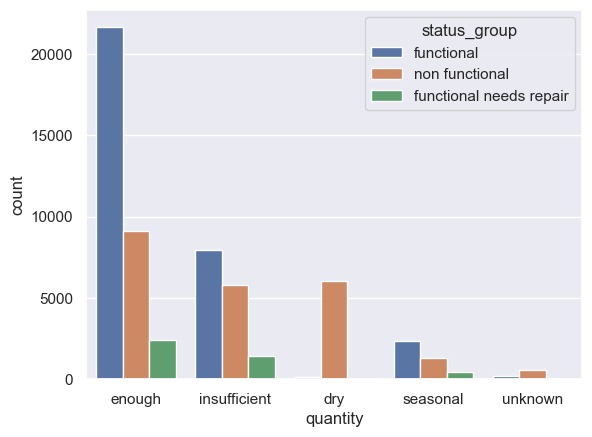

In [903]:
ax = sns.countplot(x='quantity', hue="status_group", data=df)

It can be seen obviously that although there are enough water quantity in some wells, they are non-functional. When looking at this graph, dry quantity water points have a highly correlation with non-functionality. If the water point is dry or unknown, there is high chance thw water point is non functional. On the other hand, if the quantity is enough, there is a higher chance to find functional water points.

source / source_type / source_class columns

In [904]:
df['source'].value_counts()

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

In [905]:
df['source_type'].value_counts()

source_type
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: count, dtype: int64

In [906]:
df.groupby(['source_class','source']).count()
# to see how many sub-groups have in source_class according to source column

id  status_group  amount_tsh  \
source_class source                                                  
groundwater  hand dtw                874           874         874   
             machine dbh           11075         11075       11075   
             shallow well          16824         16824       16824   
             spring                17021         17021       17021   
surface      dam                     656           656         656   
             lake                    765           765         765   
             rainwater harvesting   2295          2295        2295   
             river                  9612          9612        9612   
unknown      other                   212           212         212   
             unknown                  66            66          66   

                                   date_recorded  funder  gps_height  \
source_class source                                                    
groundwater  hand dtw                        874     868         874   
             machine dbh                   11075   10251       11075   
             shallow well                  16824   16301       16824   
             spring                        17021   15870       17021   
surface      dam                             656     647         656   
             lake                            765     763         765   
             rainwater harvesting           2295    2099        2295   
             river                          9612    8715        9612   
unknown      other                           212     204         212   
             unknown                          66      45          66   

                                   installer  longitude  latitude  wpt_name  \
source_class source                                                           
groundwater  hand dtw                    868        874       874       874   
             machine dbh               10246      11075     11075     11074   
             shallow well              16286      16824     16824     16824   
             spring                    15870      17021     17021     17020   
surface      dam                         646        656       656       656   
             lake                        762        765       765       765   
             rainwater harvesting       2096       2295      2295      2295   
             river                      8721       9612      9612      9612   
unknown      other                       204        212       212       212   
             unknown                      46         66        66        66   

                                   num_private  basin  subvillage  region  \
source_class source                                                         
groundwater  hand dtw                      874    874         874     874   
             machine dbh                 11075  11075       10849   11075   
             shallow well                16824  16824       16817   16824   
             spring                      17021  17021       16886   17021   
surface      dam                           656    656         656     656   
             lake                          765    765         764     765   
             rainwater harvesting         2295   2295        2293    2295   
             river                        9612   9612        9612    9612   
unknown      other                         212    212         212     212   
             unknown                        66     66          66      66   

                                   region_code  district_code    lga   ward  \
source_class source                                                           
groundwater  hand dtw                      874            874    874    874   
             machine dbh                 11075          11075  11075  11075   
             shallow well                16824          16824  16824  16824   
             spring                      17021          17021  


It is obvious that these three columns keep same information. so, we decided to keep just 'source' column, because it has more detailed information and we will drop others.

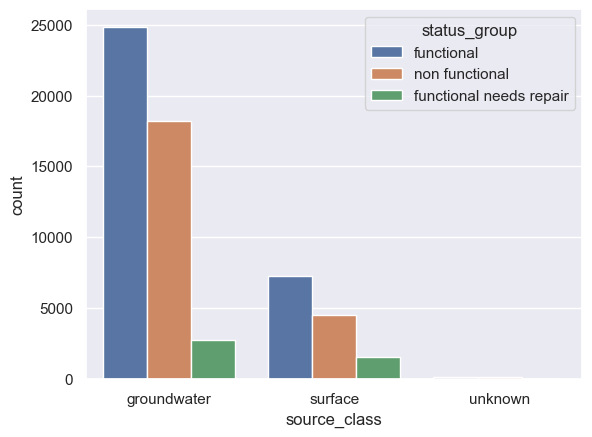

In [907]:
ax = sns.countplot(x='source_class', hue="status_group", data=df)

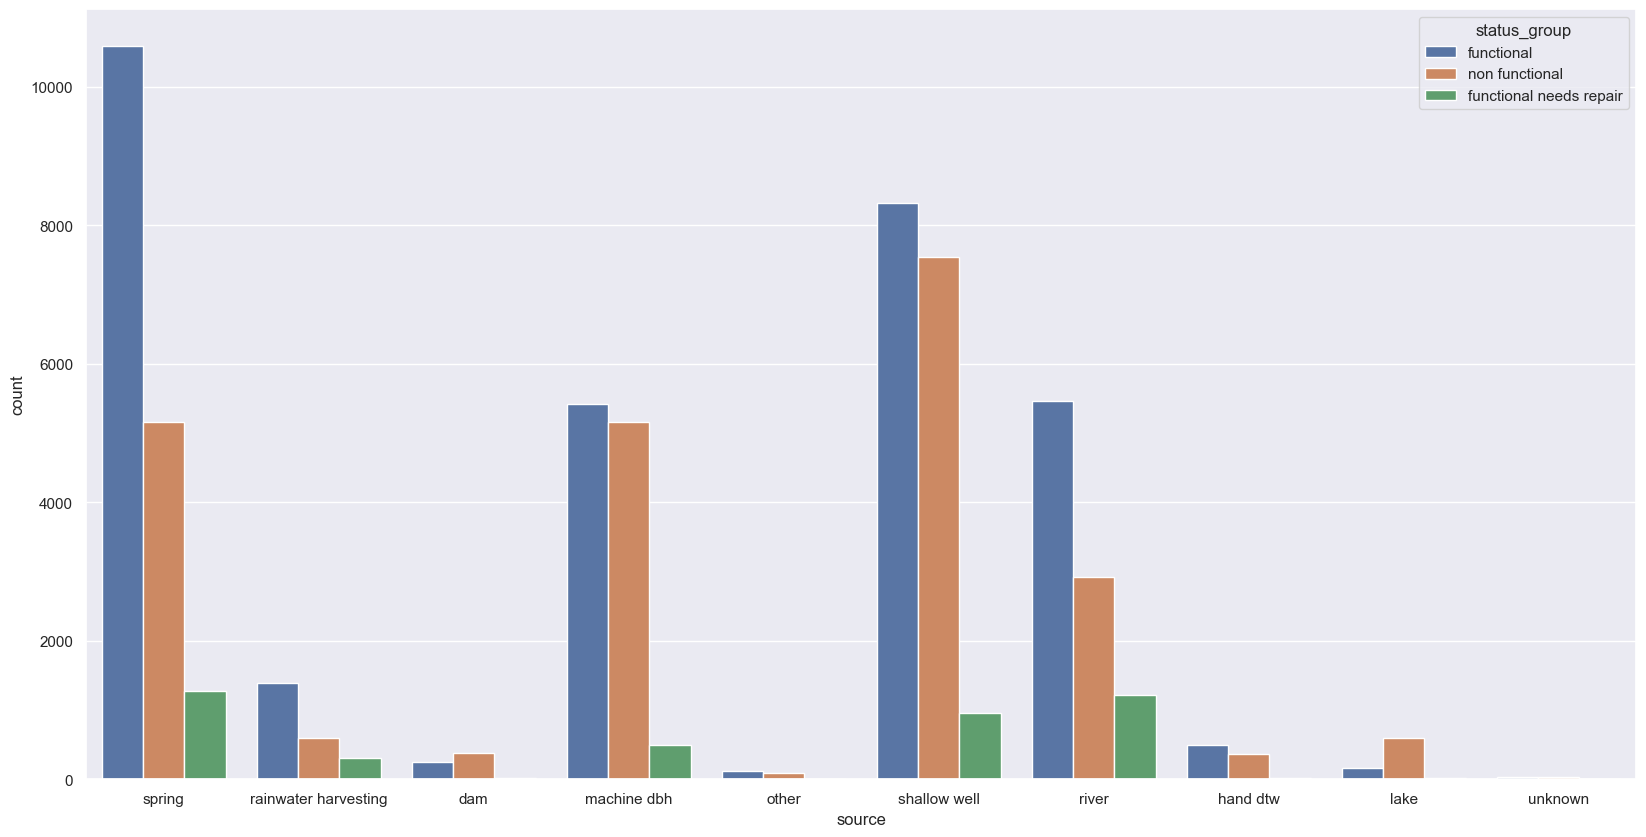

In [908]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

When we look at the columns, there are lots of non-functional ground water. And, it is interesting that machine dbh and swallow well sources nearly have same functional and non-functional waterpoints.

**water_quality / quality_group **

In [909]:
df['water_quality'].value_counts()

water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

In [910]:
df['quality_group'].value_counts()

quality_group
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: count, dtype: int64

'water_quality' column has more unique values, so we will keep 'water_quality' and drop 'quality_group'.

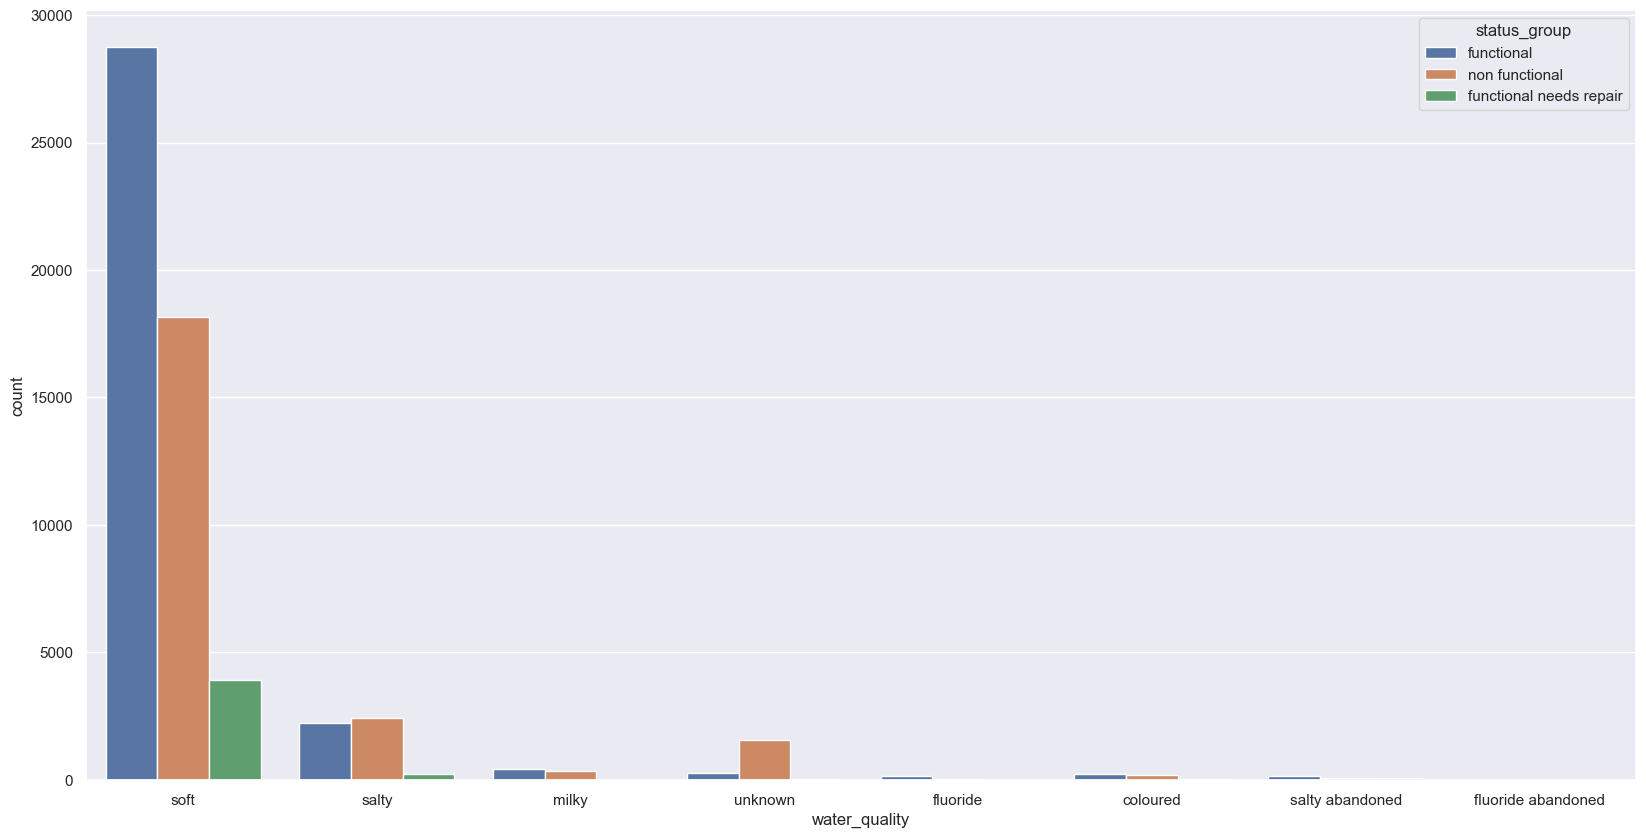

In [911]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

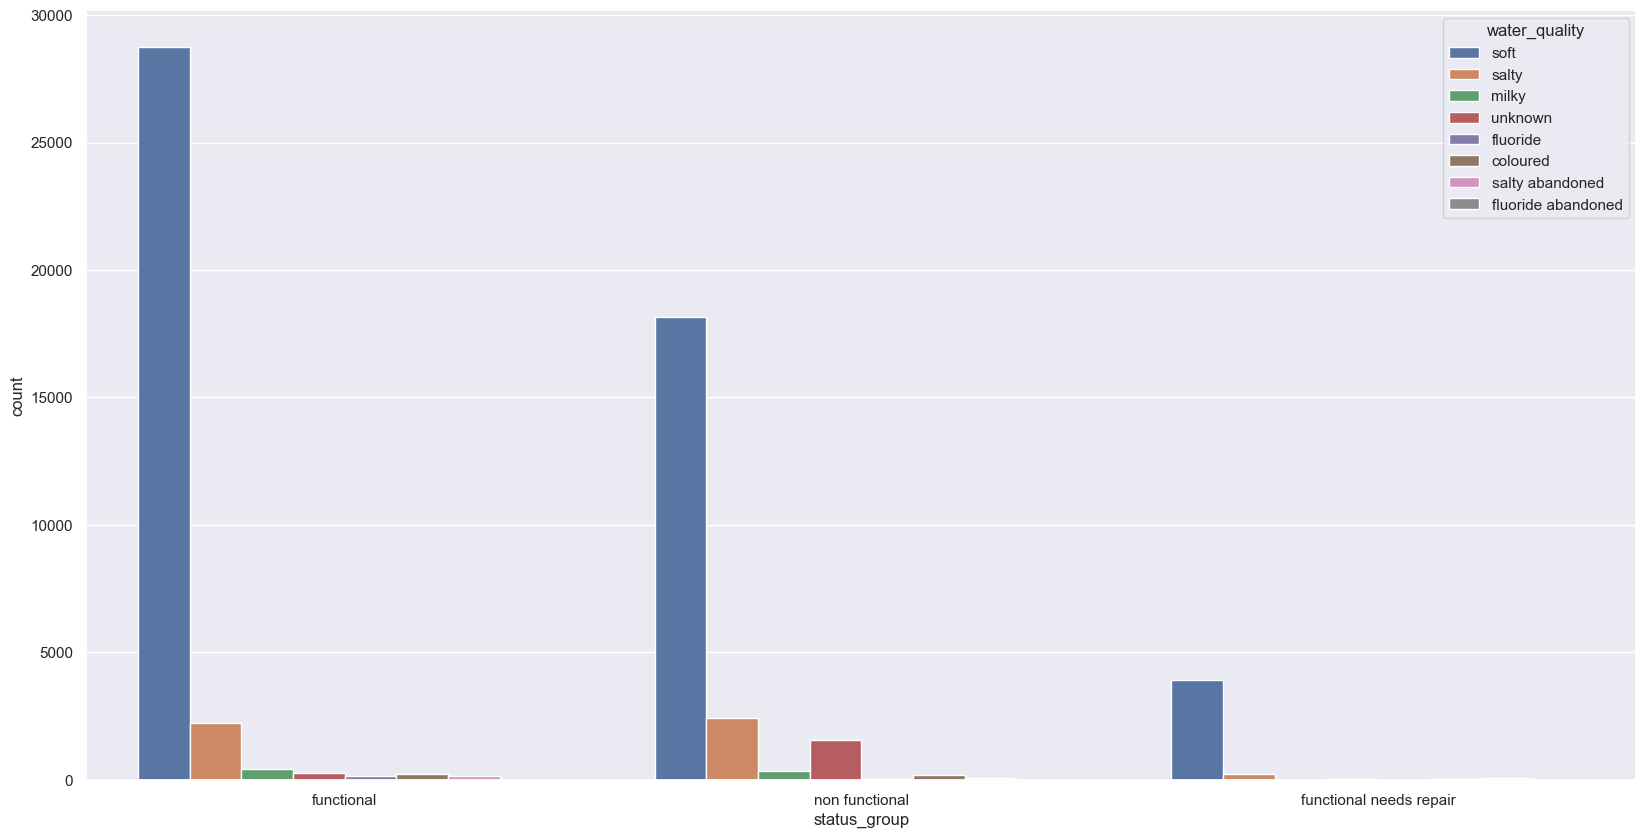

In [912]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='status_group', hue="water_quality", data=df)

From the graphs, it is seen that lots of non-functional water points have soft, good water quality

payment / payment_type columns:





In [913]:
df['payment'].value_counts()

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64

In [914]:
df['payment_type'].value_counts()

payment_type
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: count, dtype: int64

These two columns are same so we decided to drop one of them.

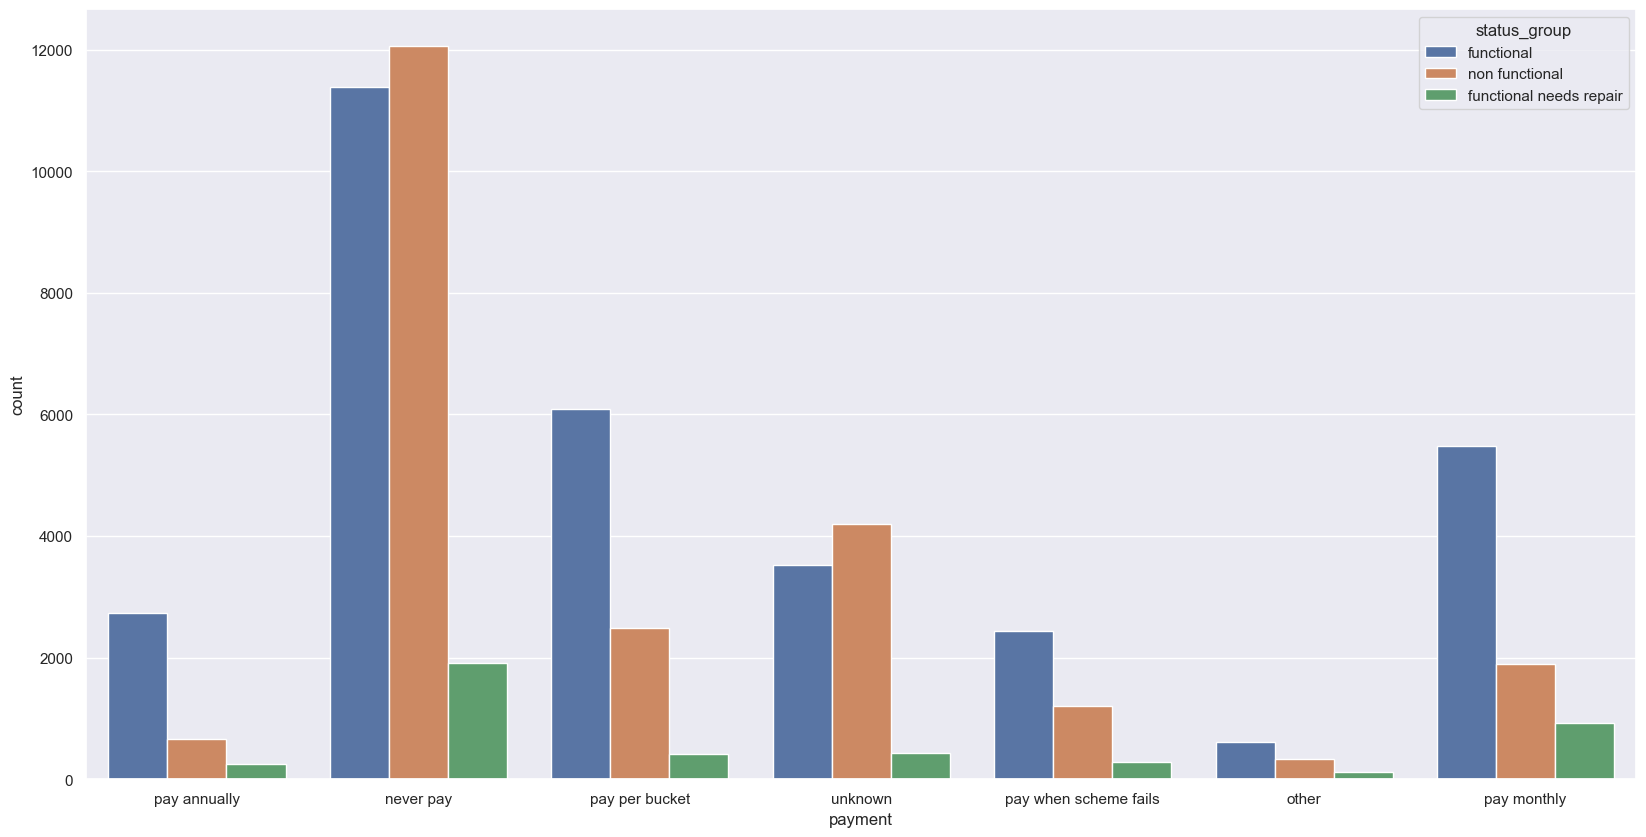

In [915]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df)

This feature shows us what the water cost. Mostly, there are lots of non-functioal water points as never paid for them.

extraction_type / extraction_type_group / extraction_type_class columns

In [916]:
df['extraction_type'].value_counts()

extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64

In [917]:
df['extraction_type_group'].value_counts()

extraction_type_group
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: count, dtype: int64

In [918]:
df['extraction_type_class'].value_counts()

extraction_type_class
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: count, dtype: int64

In [919]:
df.groupby(['extraction_type_class','extraction_type_group']).count()
# to see how many sub-groups have in extraction_type_clas according to extraction_type_group

id  status_group  amount_tsh  \
extraction_type_class extraction_type_group                                    
gravity               gravity                26780         26780       26780   
handpump              afridev                 1770          1770        1770   
                      india mark ii           2400          2400        2400   
                      india mark iii            98            98          98   
                      nira/tanira             8154          8154        8154   
                      other handpump           364           364         364   
                      swn 80                  3670          3670        3670   
motorpump             mono                    2865          2865        2865   
                      other motorpump          122           122         122   
other                 other                   6430          6430        6430   
rope pump             rope pump                451           451         451   
submersible           submersible             6179          6179        6179   
wind-powered          wind-powered             117           117         117   

                                             date_recorded  funder  \
extraction_type_class extraction_type_group                          
gravity               gravity                        26780   24704   
handpump              afridev                         1770    1668   
                      india mark ii                   2400    2358   
                      india mark iii                    98      98   
                      nira/tanira                     8154    7899   
                      other handpump                   364     353   
                      swn 80                          3670    3595   
motorpump             mono                            2865    2577   
                      other motorpump                  122     122   
other                 other                           6430    6010   
rope pump             rope pump                        451     448   
submersible           submersible                     6179    5819   
wind-powered          wind-powered                     117     112   

                                             gps_height  installer  longitude  \
extraction_type_class extraction_type_group                                     
gravity               gravity                     26780      24714      26780   
handpump              afridev                      1770       1665       1770   
                      india mark ii                2400       2358       2400   
                      india mark iii                 98         98         98   
                      nira/tanira                  8154       7885       8154   
                      other handpump                364        354        364   
                      swn 80                       3670       3593       3670   
motorpump             mono                         2865       2578       2865   
                      other motorpump               122        122        122   
other                 other                        6430       6002       6430   
rope pump             rope pump                     451        448        451   
submersible           submersible                  6179       5816       6179   
wind-powered          wind-powered                  117        112        117   

                                             latitude  wpt_name  num_private  \
extraction_type_class extraction_type_group                                    
gravity               gravity                   26780     26779        26780   
handpump              afridev                    1770      1770         1770   
                      india mark ii              2400      2400         2400   
                      india mark iii               98        98           98   
                      nira/tanira                8154      8154         8154   
                    

It is obviously seen that these three columns keep same information. So, we decided to keep 'extraction_type_group' and drop others. Although, extraction_type has more unique values than extraction_type_group , some of these values are very small amount according to this big dataset. We prefered to use more compact one. Also, extraction_type_class contains less detail. So, extraction_type_group is chosen to keep.

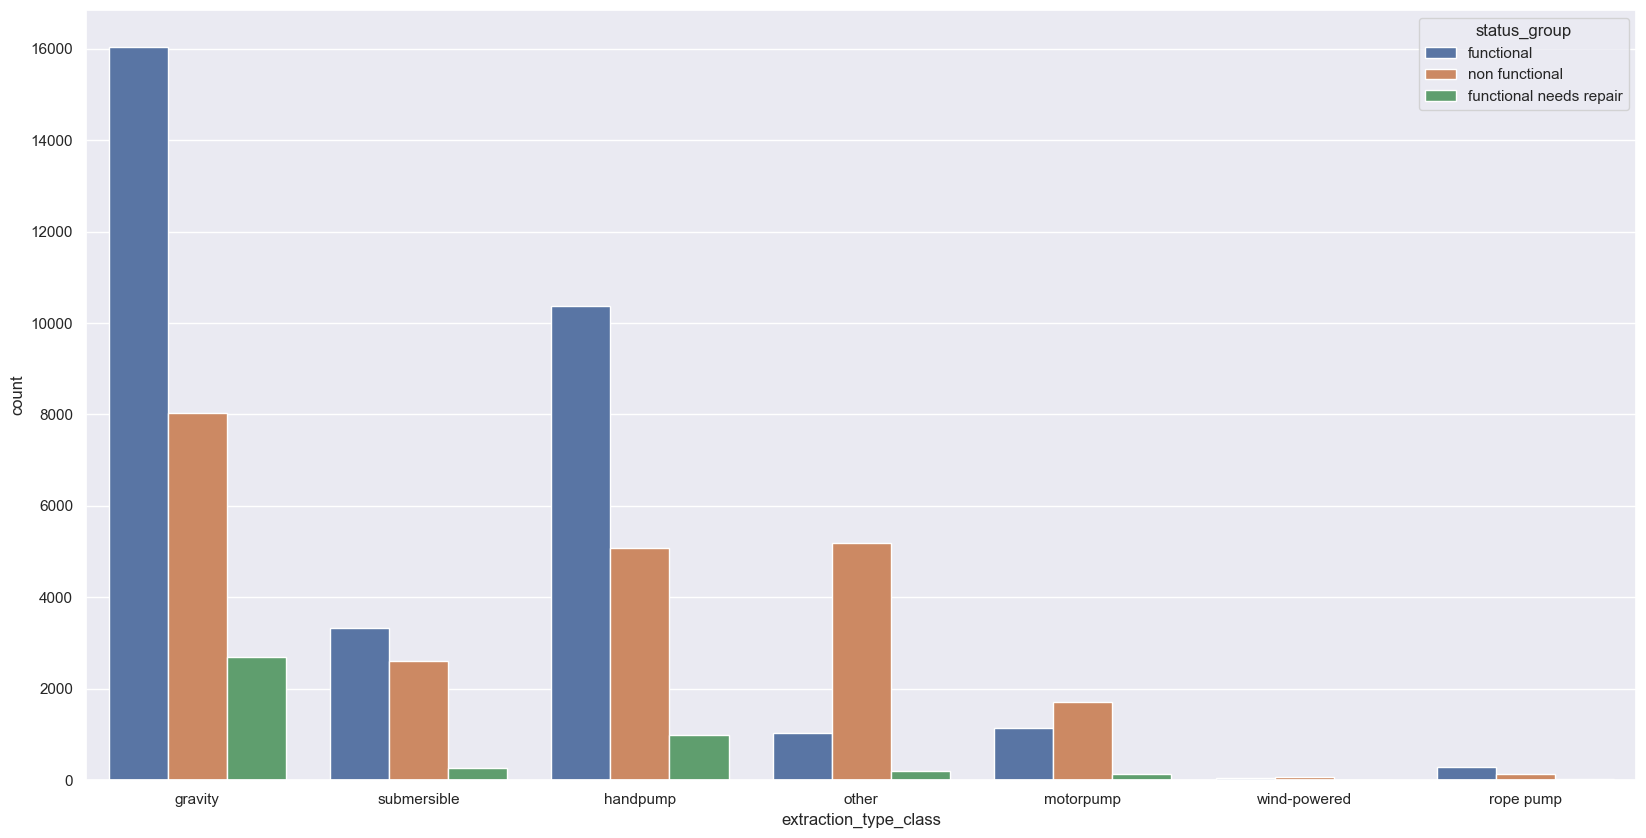

In [920]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_class', hue="status_group", data=df)

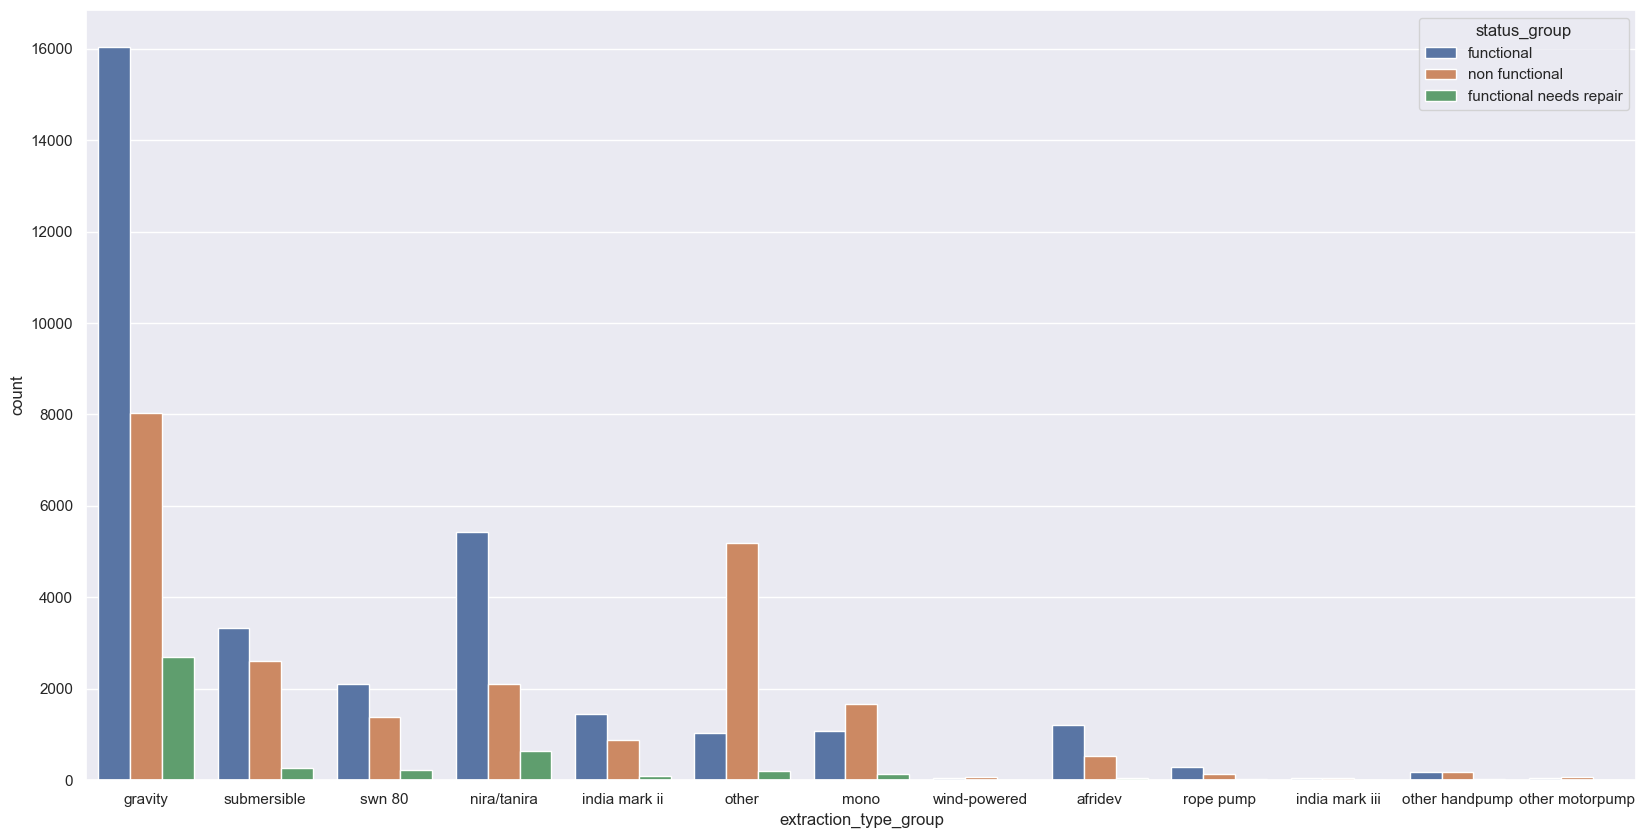

In [921]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=df)

Especially, other and mono extraction types have higher change to be non-functional than functional.

waterpoint_type / waterpoint_type_group

In [922]:
df['waterpoint_type'].value_counts()

waterpoint_type
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: count, dtype: int64

In [923]:
df['waterpoint_type_group'].value_counts()

waterpoint_type_group
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: count, dtype: int64

We decided to keep 'waterpoint_type' which contains more detail.

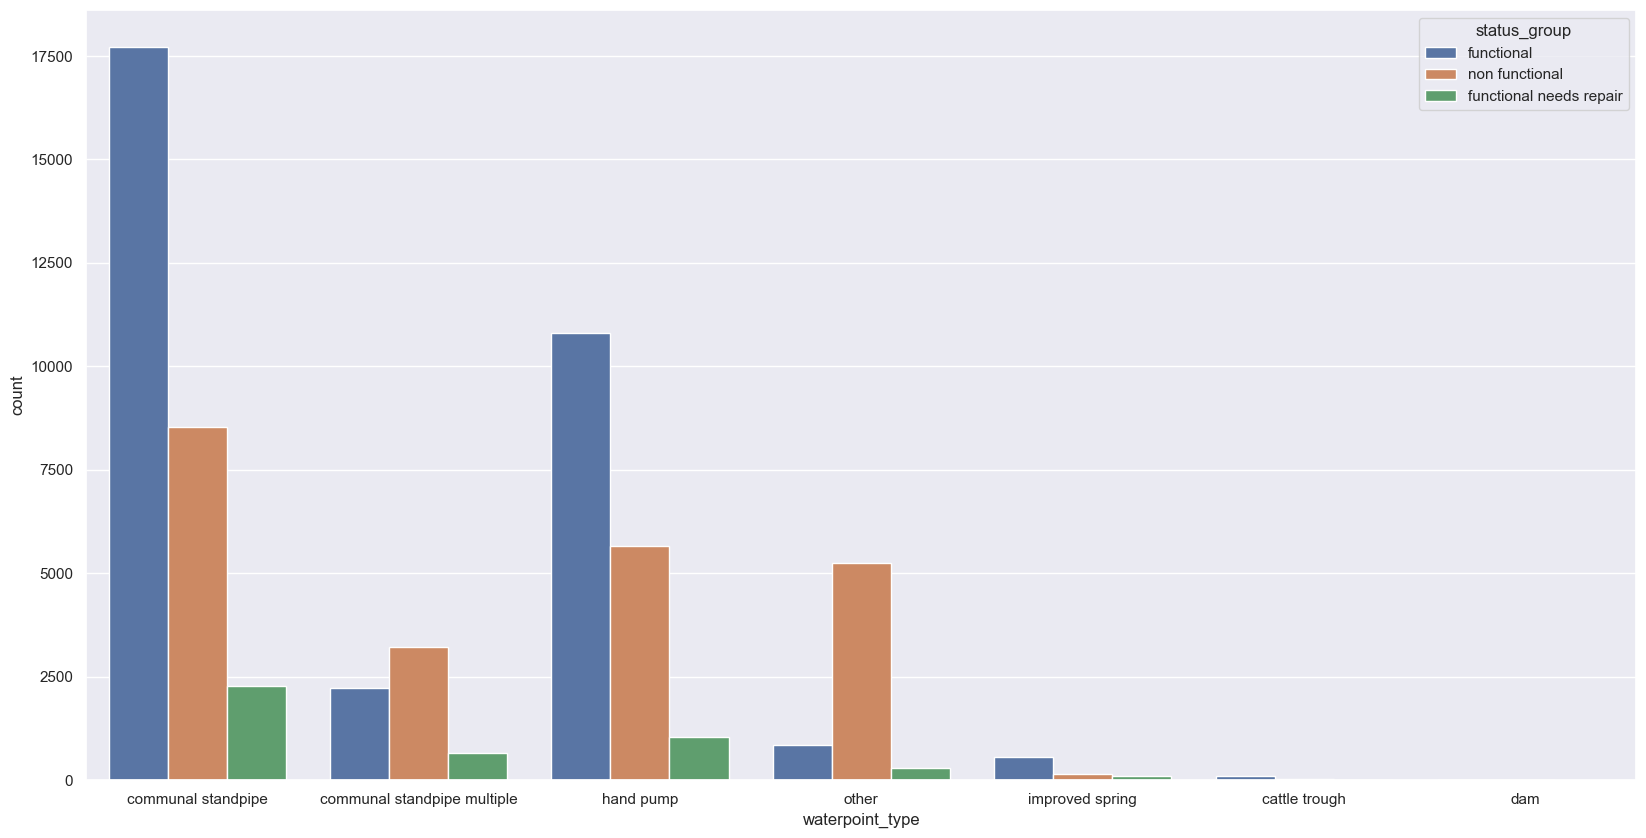

In [924]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

It can be seen that waterpoint type has correlation with funtionality of water points. Such that, communal standpipe has higher possibility to have functional, although communal standpipe multiple and others have higher possibility for non-functionality.

# Dropping Similar Columns

In [925]:
df.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )

In [926]:
df['construction_year'].value_counts()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

New feature is added to the dataset. The year values are converted to decades for future encoding. Zero shows the missing values. This have majority of the data set so, it will not be changed to the mean or median, kept as new value in decades.

In [927]:
df['decade'] = df['construction_year'] #creating new columns

In [928]:
df['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

In [929]:
df['decade'].value_counts()

decade
0      20709
00s    15330
90s     7678
80s     5578
10s     5161
70s     4406
60s      538
Name: count, dtype: int64

In [930]:
df.loc[df['construction_year']!=0].describe() # finding mean and median without zero values

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,37083.008736,466.457534,1002.367760,35.983262,-6.235372,0.707710,15.706495,5.969786,269.799617,1996.814686
std,21420.922010,3541.036030,618.078669,2.558709,2.761317,15.083957,21.003006,10.700673,552.343746,12.472045
min,1.000000,0.000000,-63.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,0.000000,1960.000000
25%,18489.500000,0.000000,372.000000,34.676719,-8.755274,0.000000,4.000000,2.000000,30.000000,1987.000000
50%,37078.000000,0.000000,1154.000000,36.648187,-6.064216,0.000000,11.000000,3.000000,150.000000,2000.000000
75%,55514.500000,200.000000,1488.000000,37.803940,-3.650661,0.000000,16.000000,5.000000,305.000000,2008.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,63.000000,30500.000000,2013.000000


In [931]:
df['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)
#changing the missing values in construction year column

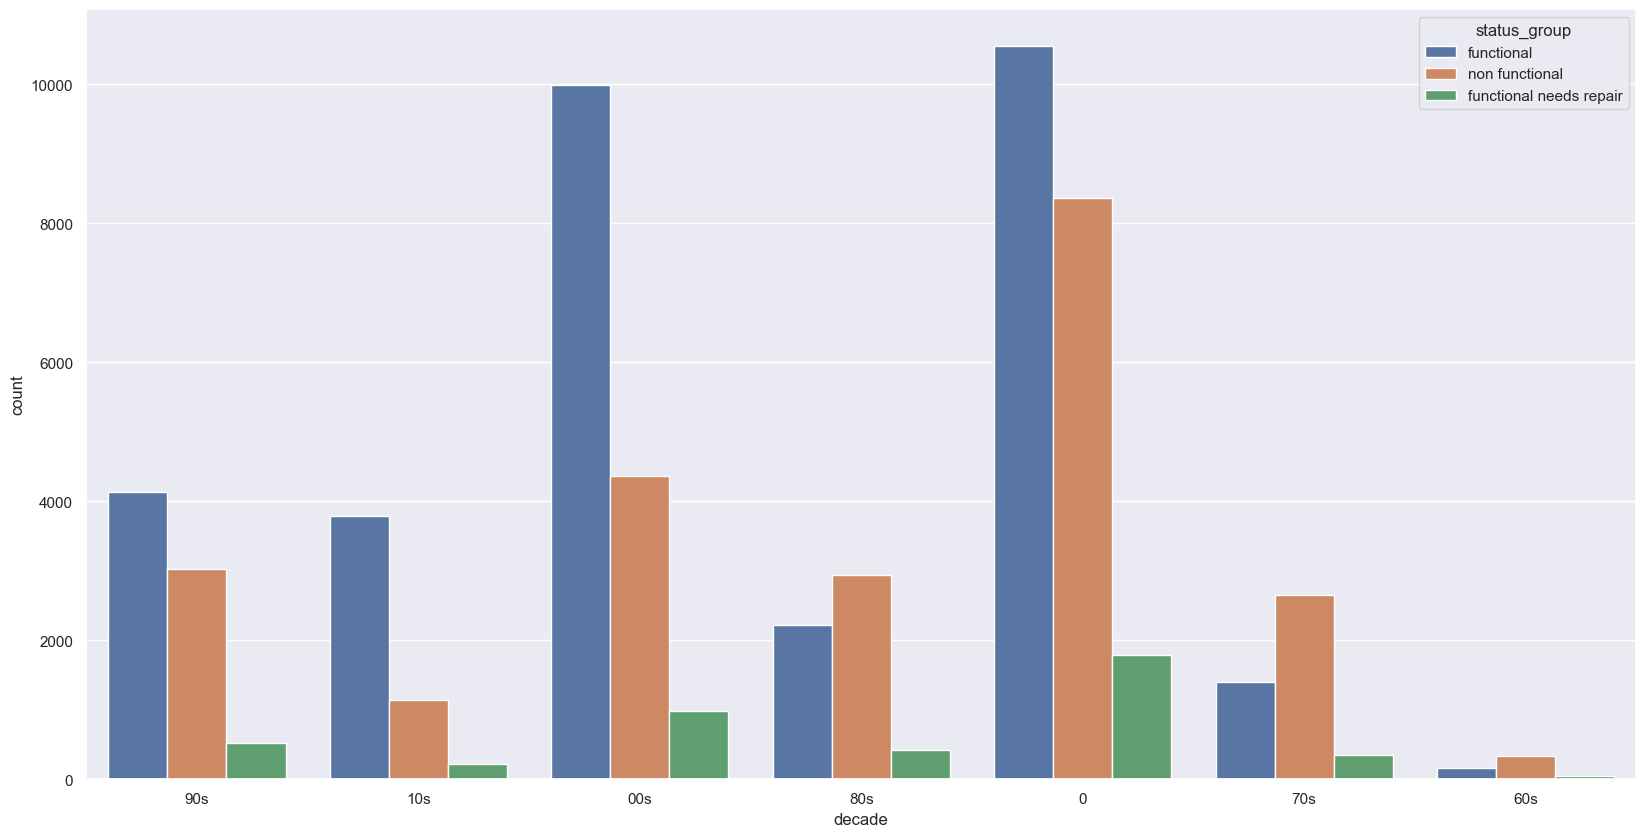

In [932]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='decade', hue="status_group", data=df)

It is obviously seen that missing values and most recent years have more functional water points.

## recorded_by column

In [933]:
df['recorded_by'].value_counts()

recorded_by
GeoData Consultants Ltd    59400
Name: count, dtype: int64

The recorded_by column has one value. This will not give any information to our model. So, we dropped it also.

In [934]:
df.drop(columns=['recorded_by'],inplace=True ) #dropping the column

# installer column

There are lots of NaN and 0 values in this column. Firstly, we will convert them to unknown.

In [935]:
df['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown

In [936]:
df['installer'].value_counts().head(100).sum() # to check the first common 100 values sum

47237

In [937]:
# From the most common 100 value counts we realized some spelling mistakes or different syntax between same categories

# Replacing the spelling mistakes and collect same categories in same name

df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci',
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church',
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government',
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr',
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi',
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community',
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [938]:
# continue to replacing spellin mistakes and getting together values
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [939]:
(47237*100)/59400 # percentage of seeing value counts of installer

79.52356902356902

e checked the first 100 value counts of installer column. Because we realized some installer names are written with mistake and given as different like 'District Council' and 'District council'. So, we will change the values which we realied. The first 100 value counts contains 47237 values. It means 79.5% of data is checked.

Now we want to see most common 20 values and visualize them to see the functionality. For this plot, we will not take the values which are smaller than 400. Because this amount does not have majority in this data and it is not good to see thousands of values in same graph.

In [940]:
df['installer'].value_counts().head(20) #taking most 20 common installer

installer
DWE                   17402
Unknown                3658
Government             2660
Community              1674
DANIDA                 1602
HESAWA                 1379
RWE                    1206
District council       1179
Central government     1114
KKKT                    898
0                       777
TCRS                    707
world vision            681
CES                     610
Fini Water              593
RC Church               461
villagers               408
LGA                     408
WEDECO                  397
TASAF                   396
Name: count, dtype: int64

In [941]:
# Creating new dataframe which just picks our desired values

df_1 = df.loc[df['installer']== 'DWE']
df_2 = df.loc[df['installer']== 'Unknown']
df_3 = df.loc[df['installer']== 'Government']
df_4 = df.loc[df['installer']== 'Community']
df_5 = df.loc[df['installer']== 'DANIDA']
df_6 = df.loc[df['installer']== 'RWE']
df_7 = df.loc[df['installer']== 'District council']
df_8 = df.loc[df['installer']== 'Central government']
df_9 = df.loc[df['installer']== 'KKKT']
df_10 = df.loc[df['installer']== 'HESAWA']
df_11 = df.loc[df['installer']== 'TCRS']
df_12 = df.loc[df['installer']== 'world vision']
df_13 = df.loc[df['installer']== 'CES']
df_14 = df.loc[df['installer']== 'Fini Water']
df_15 = df.loc[df['installer']== 'RC Church']
df_16 = df.loc[df['installer']== 'villagers']
df_17 = df.loc[df['installer']== 'LGA']

df_installer = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,
                          df_13,df_14,df_15,df_16,df_17], ignore_index=True)

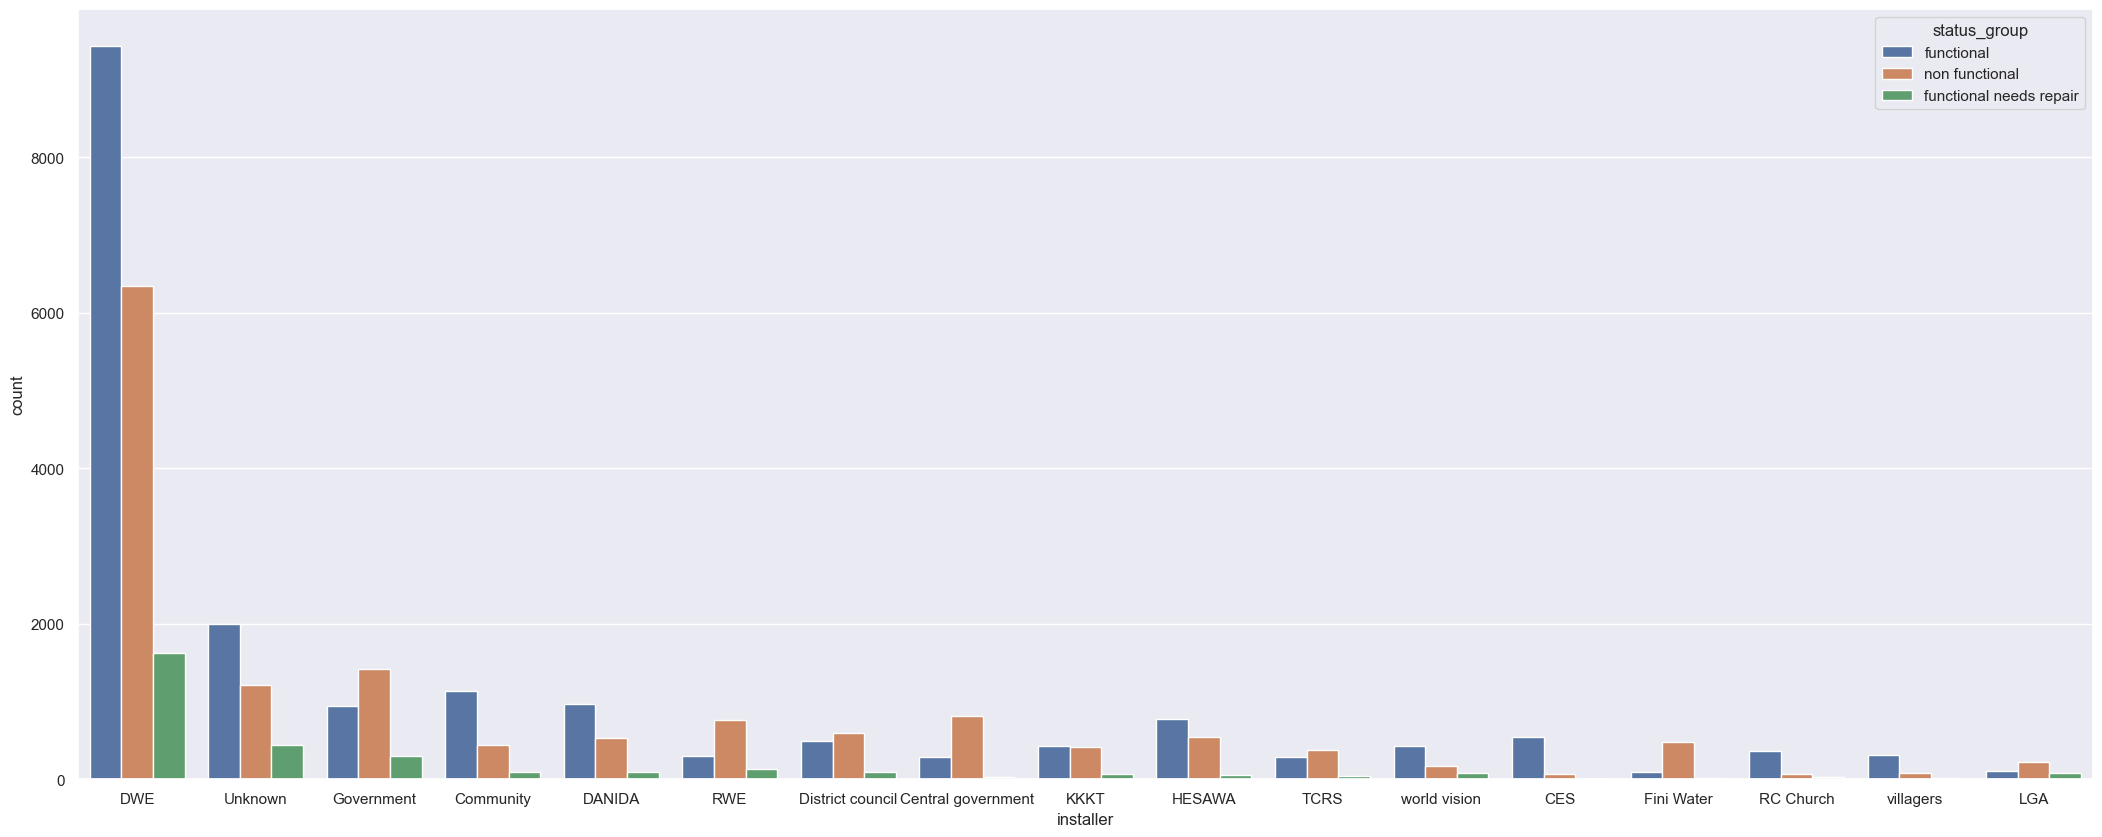

In [942]:
plt.figure(figsize=(26,10))
ax = sns.countplot(x='installer', hue="status_group", data=df_installer)

t is interesting that most of water points which central government and district council installed are non-functional. DWE has the majority of functional wells but has also many non-functional wells.

To ease our encoding later on, we will collect installers which has less than 400 value counts together and named them others.

In [943]:
df['installer_cat'] = df['installer'] # To make new categorizes, creating new column

In [944]:
df_test=pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv')

In [945]:
df_test['installer_cat'] = df_test['installer']

In [946]:
c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df.loc[~df["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others

Now, we have new feature as installer_cat with 17 unique values.

In [947]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)
# filling 0 and null values with unknown

In [948]:
df['funder'].value_counts().head(20)

funder
Government Of Tanzania    9084
Unknown                   4418
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: count, dtype: int64

This column is highly categorical column with thousands different values. So, we will take most common 20 values for future encoding.

In [949]:
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']
df3 = df.loc[df['funder']== 'Danida']
df4 = df.loc[df['funder']== 'Hesawa']
df5 = df.loc[df['funder']== 'Rwssp']
df6 = df.loc[df['funder']== 'World Bank']
df7 = df.loc[df['funder']== 'Kkkt']
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef']
df10 = df.loc[df['funder']== 'Tasaf']
df11 = df.loc[df['funder']== 'District Council']
df12 = df.loc[df['funder']== 'Dhv']
df13 = df.loc[df['funder']== 'Private Individual']
df14 = df.loc[df['funder']== 'Dwsp']
df15 = df.loc[df['funder']== 'Norad']
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']

df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

[Text(0, 0, 'Government Of Tanzania'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'Danida'),
 Text(3, 0, 'Hesawa'),
 Text(4, 0, 'Rwssp'),
 Text(5, 0, 'World Bank'),
 Text(6, 0, 'Kkkt'),
 Text(7, 0, 'World Vision'),
 Text(8, 0, 'Unicef'),
 Text(9, 0, 'Tasaf'),
 Text(10, 0, 'District Council'),
 Text(11, 0, 'Dhv'),
 Text(12, 0, 'Private Individual'),
 Text(13, 0, 'Dwsp'),
 Text(14, 0, 'Norad'),
 Text(15, 0, 'Germany Republi'),
 Text(16, 0, 'Tcrs'),
 Text(17, 0, 'Ministry Of Water'),
 Text(18, 0, 'Water'),
 Text(19, 0, 'Dwe')]

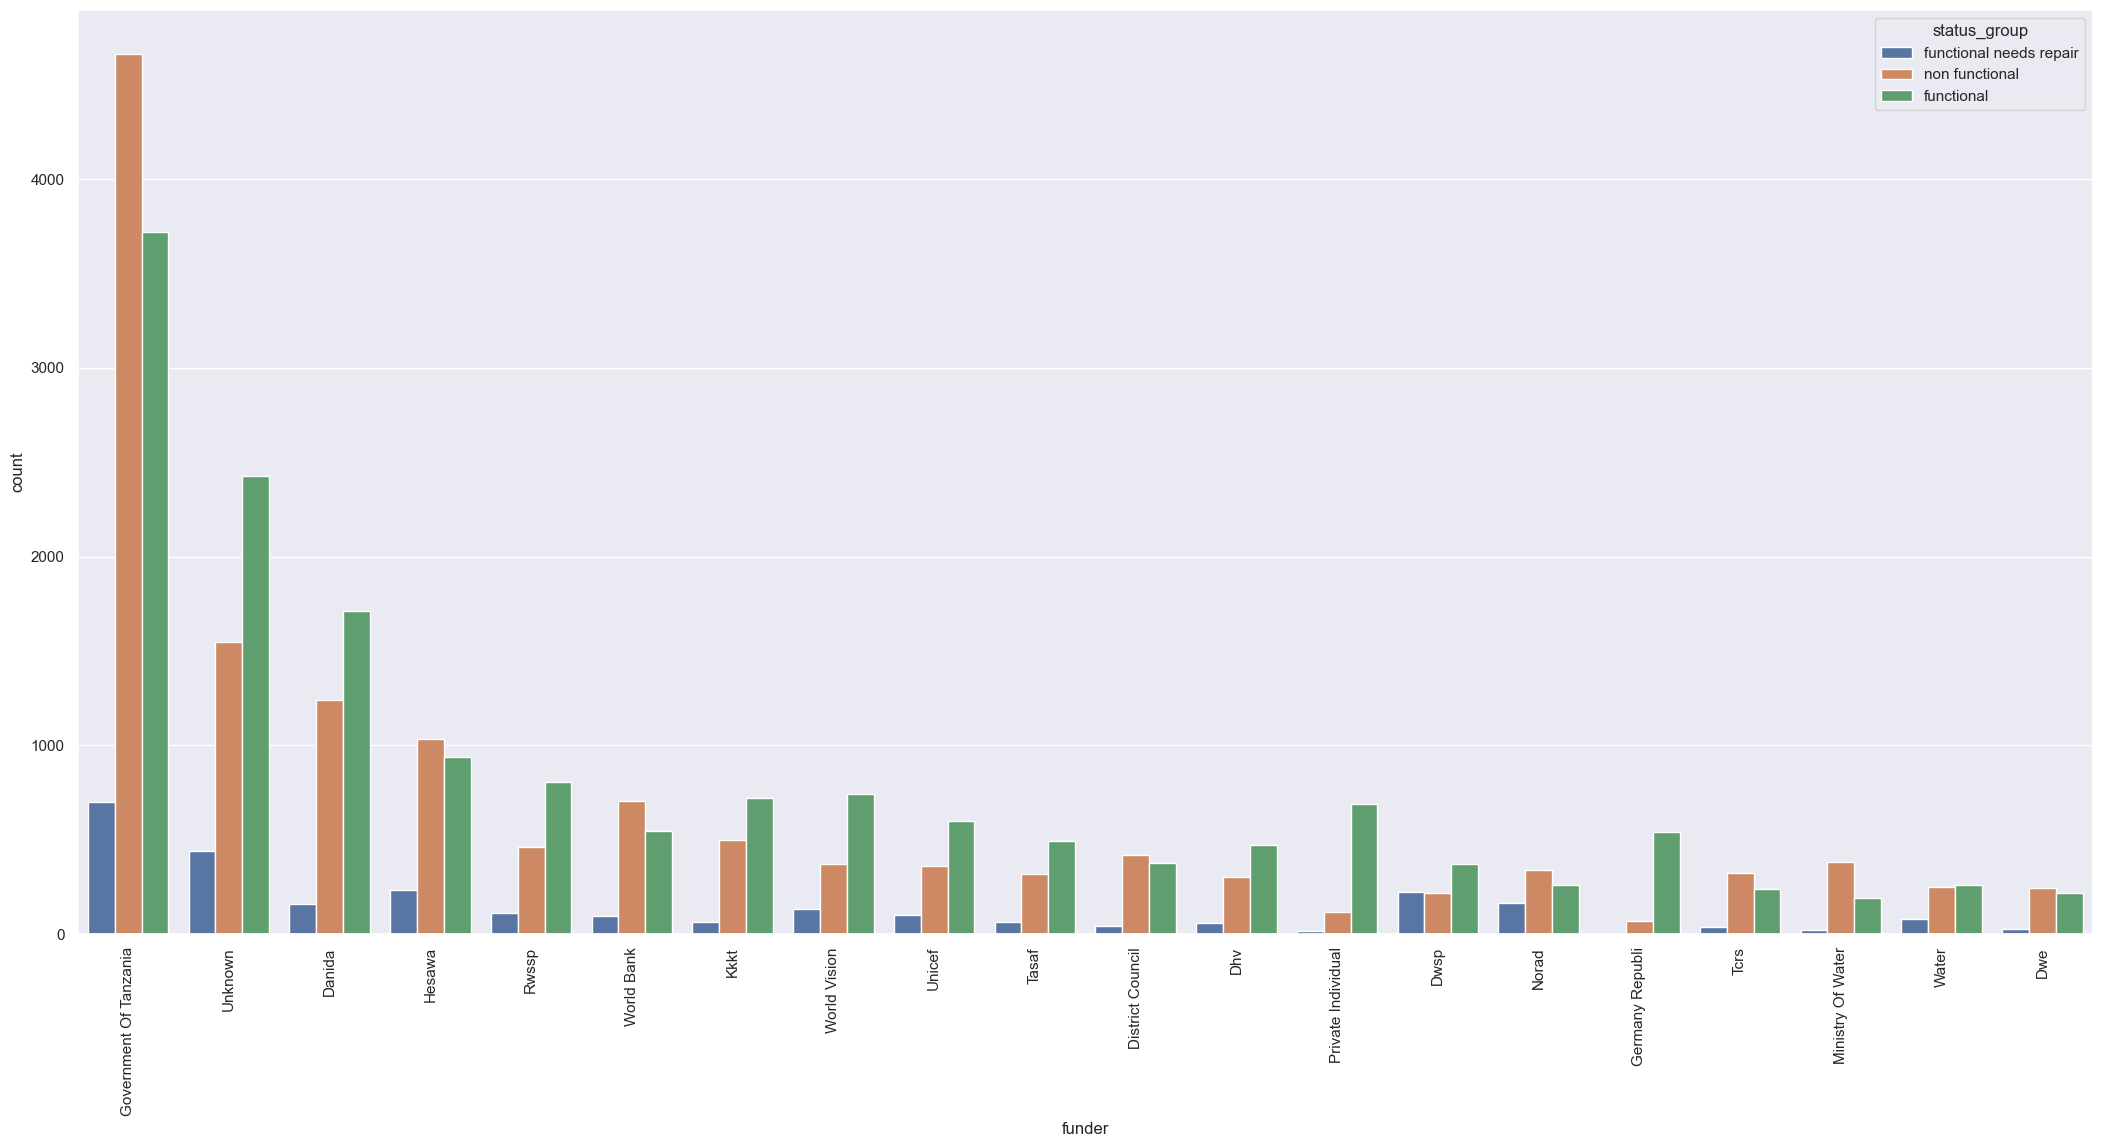

In [950]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='funder', hue="status_group", data=df_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

From the above plot, we realize that most of the water points which funded by government are non-functional.

In [951]:
df['funder_cat'] = df['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']


df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [952]:
df['funder_cat'].nunique() # We have 21 unique values for this column

21

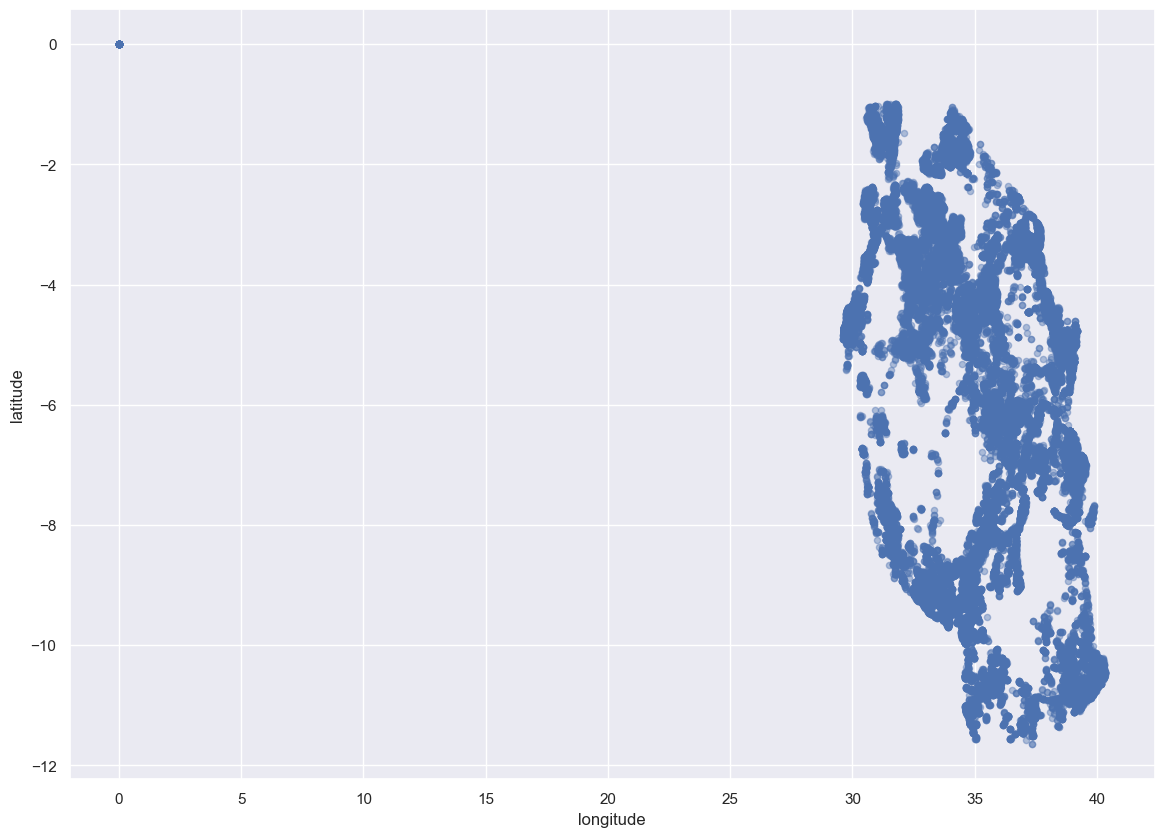

In [953]:
df.plot(kind='scatter', x="longitude", y="latitude", alpha=0.4, figsize=(14,10),sharex=False);
# To see the outliers

In [954]:
df.loc[df['longitude']==0] # to check outside of Tanzania

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_name,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
21,6091,functional,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,NaN,False,2000,swn 80,wug,unknown,unknown,unknown,shallow well,hand pump,0,DWE,Dwsp
53,32376,non functional,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,Nyang'hwale,True,2000,submersible,vwc,unknown,unknown,dry,machine dbh,communal standpipe multiple,0,Government,Government Of Tanzania
168,72678,functional,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,NaN,False,2000,gravity,parastatal,other,soft,seasonal,rainwater harvesting,communal standpipe,0,Others,Others
177,56725,non functional,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,NaN,False,2000,other,wug,unknown,soft,enough,shallow well,other,0,DWE,Others
253,13042,functional needs repair,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,NaN,True,2000,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,0,DWE,Hesawa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,functional needs repair,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,NaN,False,2000,nira/tanira,wug,other,soft,enough,shallow well,hand pump,0,DWE,Dwsp
59208,3631,functional,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,DWE,Dwsp
59295,60843,functional needs repair,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,NaN,False,2000,nira/tanira,wug,never pay,soft,enough,shallow well,hand pump,0,DWE,Rwssp
59324,748,functional,0.0,2013-01-22,World Vision,0,world vision,0.0,-2.000000e-08,Mwazwilo,0,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,NaN,NaN,False,2000,nira/tanira,wug,unknown,soft,enough,shallow well,hand pump,0,world vision,World Vision


In [955]:
df.loc[df['longitude']!=0].describe() # to find the non-zero values mean

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,57588.00000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000,57588.000000
mean,37106.48807,327.645219,689.325137,35.149669,-5.885572,0.489060,15.217615,5.728311,185.570831,1997.859919
std,21454.51421,3043.831403,693.564188,2.607428,2.809876,12.426954,17.855254,9.760254,477.744239,10.331744
min,0.00000,0.000000,-90.000000,29.607122,-11.649440,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18522.75000,0.000000,0.000000,33.285100,-8.643841,0.000000,5.000000,2.000000,0.000000,1995.000000
50%,37054.50000,0.000000,426.000000,35.005943,-5.172704,0.000000,12.000000,3.000000,35.000000,2000.000000
75%,55667.25000,30.000000,1332.000000,37.233712,-3.372824,0.000000,17.000000,5.000000,230.000000,2004.000000
max,74247.00000,350000.000000,2770.000000,40.345193,-0.998464,1776.000000,99.000000,80.000000,30500.000000,2013.000000


It is obviously seen that it is written as 0 when the longtitude is unknown. Because, the zero points can seen easily in the graph above outliers and outside of Tanzania. So, we changed them to mean where median is the almost same value.

In [956]:
df['longitude'].replace(to_replace = 0 , value =35.15, inplace=True) # changing 0 values to mean

wpt_name / scheme_name / id/ region/ region_code columns

In [957]:
df['wpt_name'].value_counts()

wpt_name
none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: count, Length: 37399, dtype: int64

In [958]:
df['scheme_name'].value_counts()

scheme_name
K                       682
Borehole                546
Chalinze wate           405
M                       400
DANIDA                  379
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: count, Length: 2695, dtype: int64

In [959]:
df.duplicated(subset='id', keep='first').sum() # to check the dublicates of id

0

In [960]:
df.drop(columns=['wpt_name','scheme_name','id','region_code'],inplace=True )

When we checked the wpt_name, scheme_name and id columns, they do not have any information about functionality. So, we decide to drop them. We dropped also region_code column because region column gives more information about the region. Also, before dropping columns we check the dublicated values in dataframe.

In [961]:
df['region'].value_counts()

region
Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: count, dtype: int64

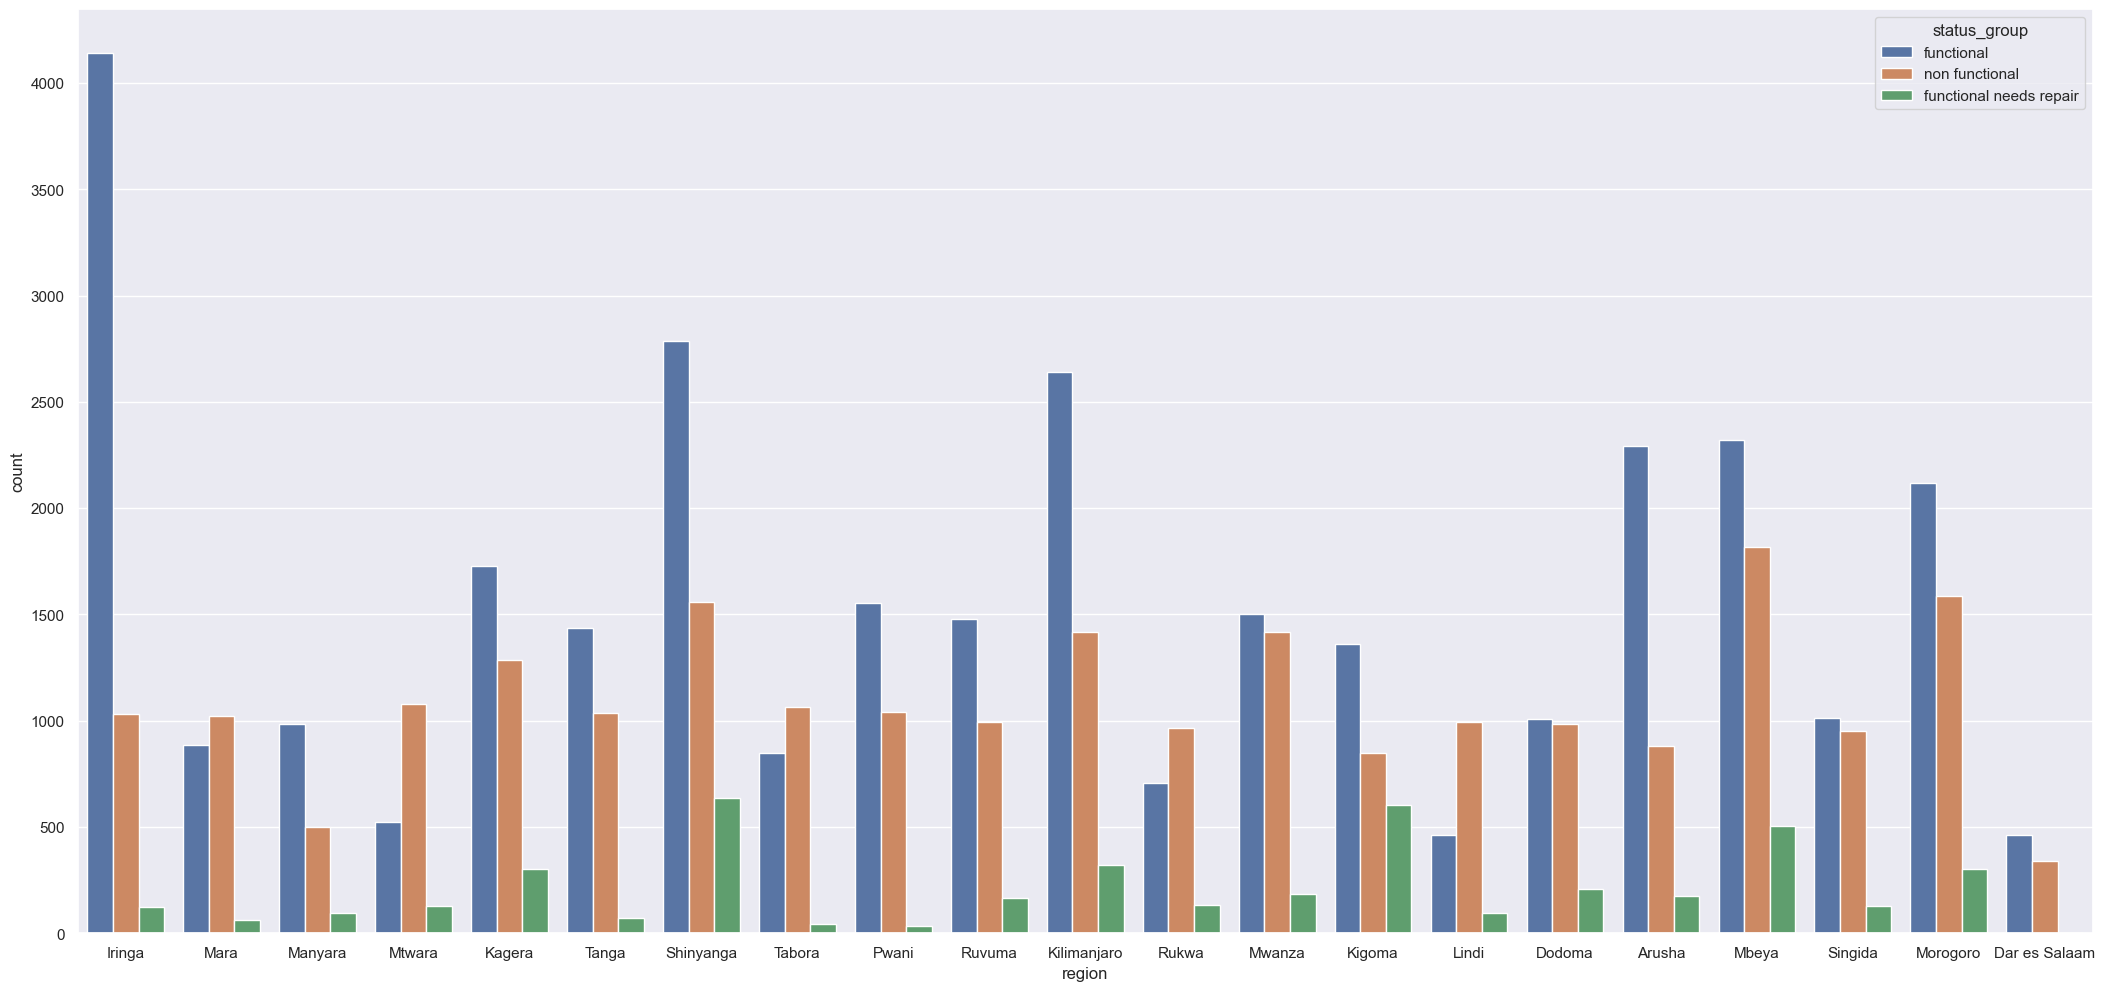

In [962]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='region', hue="status_group", data=df)

Some regions has higher probability of functional water well. Klimanjaro and Arusha have Pangani basin which has higher water point between basins. It is also seen that they have higher portions for functional wells

In [963]:
df_iringa =df.loc[df['region']=='Iringa'] #to see the Iringa area
df_iringa.groupby(['water_quality','status_group']).count()

amount_tsh  date_recorded  funder  \
water_quality status_group                                                 
coloured      functional                        1              1       1   
              non functional                    1              1       1   
salty         functional                       19             19      19   
              non functional                    8              8       8   
soft          functional                     4120           4120    4120   
              functional needs repair         123            123     123   
              non functional                  983            983     983   
unknown       functional                        1              1       1   
              non functional                   38             38      38   

                                       gps_height  installer  longitude  \
water_quality status_group                                                
coloured      functional                        1          1          1   
              non functional                    1          1          1   
salty         functional                       19         19         19   
              non functional                    8          8          8   
soft          functional                     4120       4120       4120   
              functional needs repair         123        123        123   
              non functional                  983        983        983   
unknown       functional                        1          1          1   
              non functional                   38         38         38   

                                       latitude  num_private  basin  \
water_quality status_group                                            
coloured      functional                      1            1      1   
              non functional                  1            1      1   
salty         functional                     19           19     19   
              non functional                  8            8      8   
soft          functional                   4120         4120   4120   
              functional needs repair       123          123    123   
              non functional                983          983    983   
unknown       functional                      1            1      1   
              non functional                 38           38     38   

                                       subvillage  region  district_code  \
water_quality status_group                                                 
coloured      functional                        1       1              1   
              non functional                    1       1              1   
salty         functional                       19      19             19   
              non functional                    8       8              8   
soft          functional                     4120    4120           4120   
              functional needs repair         123     123            123   
              non functional                  983     983            983   
unknown       functional                        1       1              1   
              non functional                   38      38             38   

                                        lga  ward  population  public_meeting  \
water_quality status_group                                                      
coloured      functional                  1     1           1               1   
              non functional              1     1           1               1   
salty         functional                 19    19          19              19   
              non functional              8     8           8               8   
soft          functional               4120  4120        4120            4118   
              functional needs repair   123   123         123             123   
              non functional            983   983         983             983   
unknown       functional    

In [964]:
df_daressalaam =df.loc[df['region']=='Dar es Salaam'] #to see the Dar es Salaam area

In [965]:
df_daressalaam.groupby(['water_quality','status_group']).count()

amount_tsh  date_recorded  funder  \
water_quality      status_group                                                 
fluoride abandoned non functional                    2              2       2   
milky              functional                        1              1       1   
                   non functional                    1              1       1   
salty              functional                       41             41      41   
                   non functional                  100            100     100   
salty abandoned    functional                       63             63      63   
                   non functional                   37             37      37   
soft               functional                      352            352     352   
                   functional needs repair           3              3       3   
                   non functional                  186            186     186   
unknown            functional                        4              4       4   
                   non functional                   15             15      15   

                                            gps_height  installer  longitude  \
water_quality      status_group                                                
fluoride abandoned non functional                    2          2          2   
milky              functional                        1          1          1   
                   non functional                    1          1          1   
salty              functional                       41         41         41   
                   non functional                  100        100        100   
salty abandoned    functional                       63         63         63   
                   non functional                   37         37         37   
soft               functional                      352        352        352   
                   functional needs repair           3          3          3   
                   non functional                  186        186        186   
unknown            functional                        4          4          4   
                   non functional                   15         15         15   

                                            latitude  num_private  basin  \
water_quality      status_group                                            
fluoride abandoned non functional                  2            2      2   
milky              functional                      1            1      1   
                   non functional                  1            1      1   
salty              functional                     41           41     41   
                   non functional                100          100    100   
salty abandoned    functional                     63           63     63   
                   non functional                 37           37     37   
soft               functional                    352          352    352   
                   functional needs repair         3            3      3   
                   non functional                186          186    186   
unknown            functional                      4            4      4   
                   non functional                 15           15     15   

                                            subvillage  region  district_code  \
water_quality      status_group                                                 
fluoride abandoned non functional                    2       2              2   
milky              functional                        1       1              1   
                   non functional                    1       1              1   
salty              functional                       41      41             41   
                   non functional                  100     100            100   
salty abandoned    functional                       63      63             63   
                   non functional                   37      37             

In [966]:
df['amount_tsh'].value_counts()

amount_tsh
0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: count, Length: 98, dtype: int64

In [967]:
df.loc[df['amount_tsh']==0].groupby('status_group').count()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,19706,19706,19706,19706,19706,19706,19706,19706,19706,19501,19706,19706,19706,19706,19706,18444,18374,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706
functional needs repair,3048,3048,3048,3048,3048,3048,3048,3048,3048,3047,3048,3048,3048,3048,3048,2906,2775,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
non functional,18885,18885,18885,18885,18885,18885,18885,18885,18885,18720,18885,18885,18885,18885,18885,17475,17862,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885


In [968]:
df['amount_tsh'].value_counts()/df['amount_tsh'].count()

amount_tsh
0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
6300.0      0.000017
120000.0    0.000017
138000.0    0.000017
350000.0    0.000017
59.0        0.000017
Name: count, Length: 98, dtype: float64

We decided to drop this column because 70% of the column has no informative values. So, this column will not give idea to our model and we will drop it.

In [969]:
df.drop(columns=['amount_tsh'],inplace=True )

In [970]:
df.groupby('status_group')[['gps_height']].mean()

,gps_height
status_group,
functional,740.131188
functional needs repair,627.607135
non functional,574.464774


In [971]:
df['gps_height'].value_counts()

gps_height
 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: count, Length: 2428, dtype: int64

In [972]:
df['gps_height'].value_counts()/df['gps_height'].count()

gps_height
 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
 1290    0.000875
           ...   
 2378    0.000017
-54      0.000017
 2057    0.000017
 2332    0.000017
 2366    0.000017
Name: count, Length: 2428, dtype: float64

Gps height shows the level of the water point from sea level. There are 34% zero values but maybe 34% of the water points are at the sea level so we do not change this column now.

In [973]:
df['population'].value_counts()

population
0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: count, Length: 1049, dtype: int64

In [974]:
df.loc[df['population']==0].groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,11274,11274,11274,11274,11274,11071,11274,11274,11274,11274,11274,10700,10596,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1732,1613,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,8332,8332,8332,8332,8332,8174,8332,8332,8332,8332,8332,7967,8063,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


Some functional water points has zero population, it is weird so we will change zero population to mean.

In [975]:
df.loc[df['population']!=0].describe() # to see without zero mean and median

,gps_height,longitude,latitude,num_private,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,969.889634,36.074387,-6.139781,0.740788,6.299456,281.087167,1996.908283
std,612.544787,2.586779,2.737733,15.288297,11.303334,564.687660,12.425377
min,-90.000000,29.607122,-11.649440,0.000000,1.000000,1.000000,1960.000000
25%,347.000000,34.715340,-8.388839,0.000000,2.000000,40.000000,1988.000000
50%,1135.000000,36.706815,-5.750877,0.000000,3.000000,150.000000,2000.000000
75%,1465.000000,37.940149,-3.597016,0.000000,5.000000,324.000000,2008.000000
max,2770.000000,40.345193,-1.042375,1776.000000,67.000000,30500.000000,2013.000000


In [976]:
df['population'].replace(to_replace = 0 , value =281, inplace=True) #changing 0's to mean

In [977]:
df.sort_values(by='population', ascending=False).head(50).groupby('status_group').count()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,region,district_code,lga,ward,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,decade,installer_cat,funder_cat
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,
functional,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,34,39,39,39,39,39,39,39,39,39,39,39
functional needs repair,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,4,4,4,4,4,4,4,4,4,4
non functional,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


To see the most populated areas water point functionality , we choose crowded 50 values and did groupby. It shows that higher population areas have more functional water points.

Approximately 95% of the water points were recorded between 2011-2013. So, for now we do not think it contains necessary information about functionality. We drop this column for now.

In [978]:
df.drop(columns=['date_recorded'],inplace=True )

In [979]:
df.drop(columns=['num_private'],inplace=True )

is column has no information about it and also mostly have zero values. So, we drop this also.

In [980]:
df['basin'].value_counts()

basin
Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: count, dtype: int64

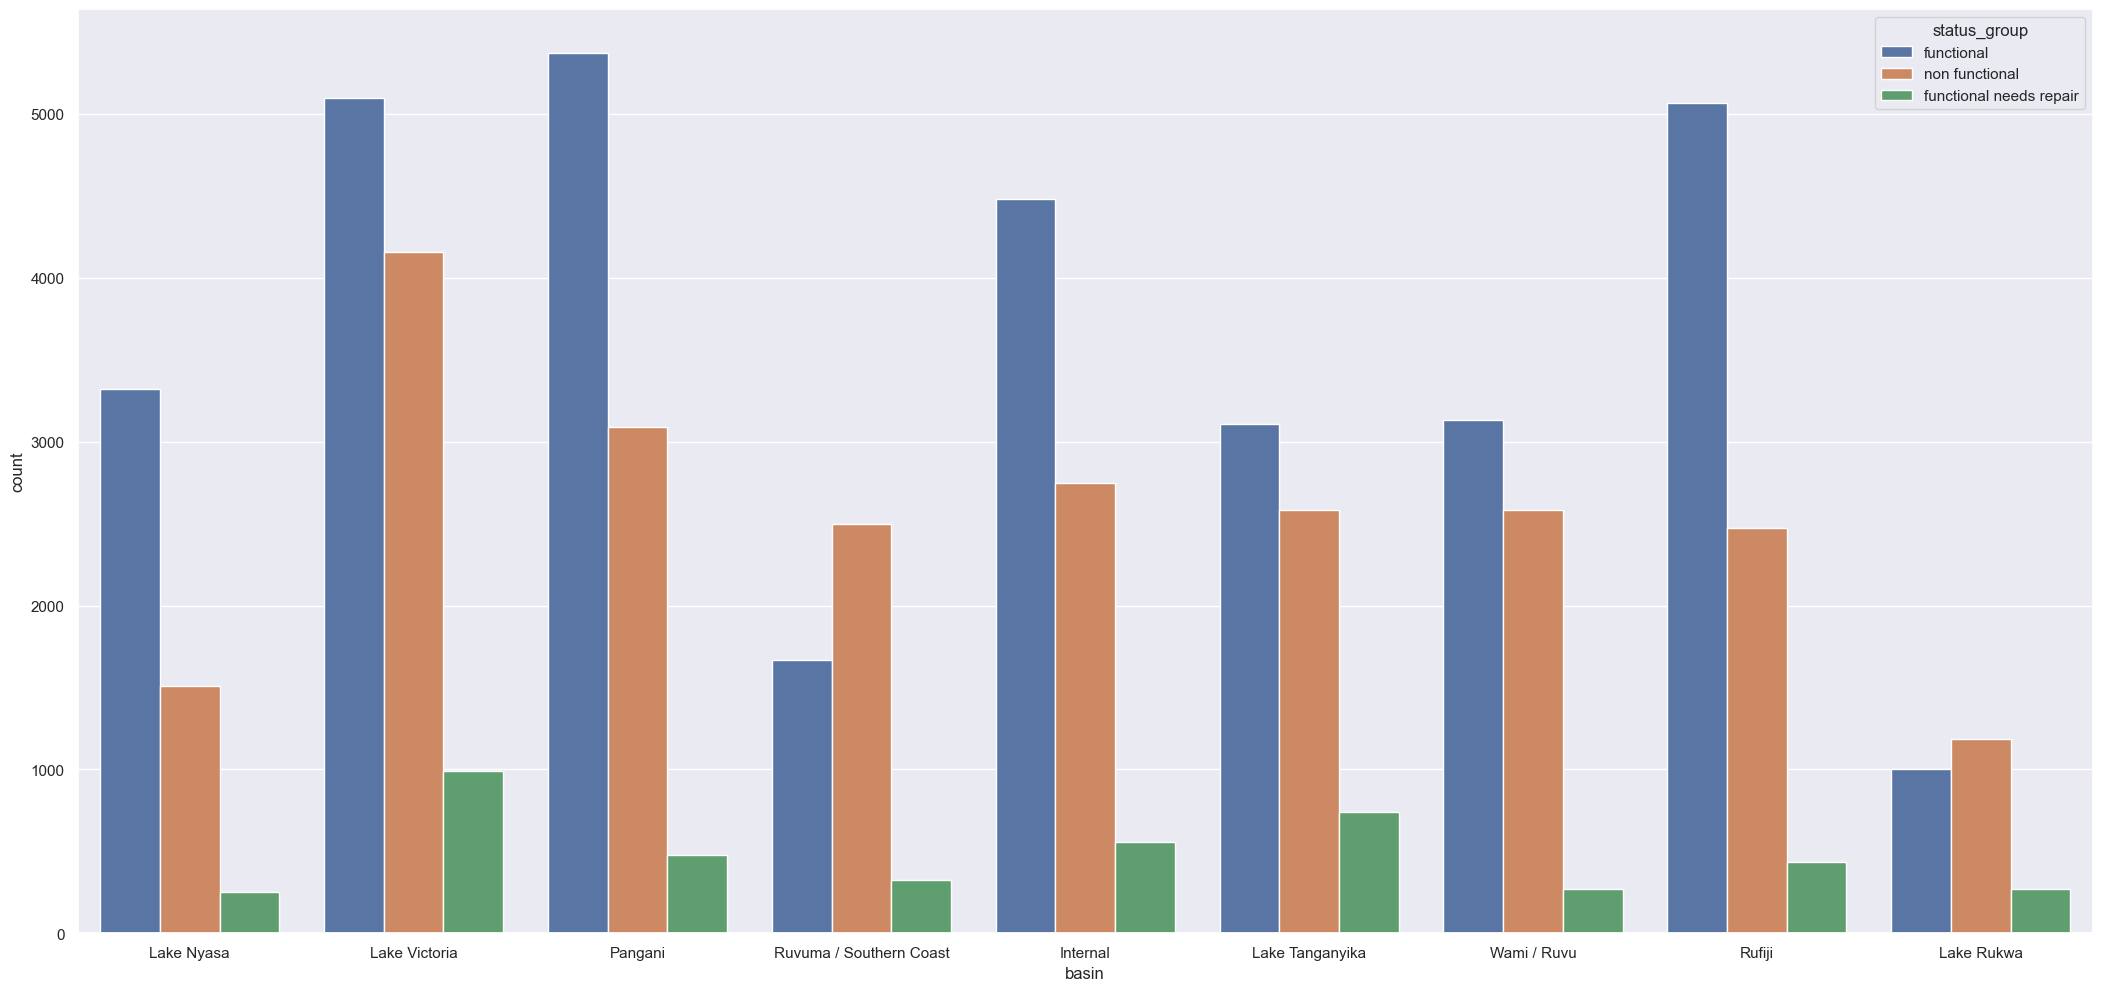

In [981]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='basin', hue="status_group", data=df)

This column gives an idea about there is correlation between functionality and geographical water basin.

In [982]:
df['subvillage'].nunique()

19287

This column has location value of water point regions but we already have region column. We will drop this, because it is hard to handle this nunique object values.

In [983]:
df.drop(columns=['subvillage'],inplace=True )

In [984]:
df['district_code'].value_counts()

district_code
1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: count, dtype: int64

In [985]:
df['public_meeting'].fillna(value=True,inplace=True)

In [986]:
df['permit'].fillna(value=True, inplace=True)

In [987]:
target_status_group = {'functional':0,
                   'non functional': 2,
                   'functional needs repair': 1}
df['status_group'] = df['status_group'].replace(target_status_group)

In [988]:
df['status_group'].value_counts()

status_group
0    32259
2    22824
1     4317
Name: count, dtype: int64

In [989]:
df.to_csv('clean_data.csv')

In [990]:
### To see the relation between water quantity and quality with functionality
df.groupby(['quantity','water_quality','status_group']).count().head(50)

funder  gps_height  installer  \
quantity     water_quality      status_group                                  
dry          coloured           1                  1           1          1   
                                2                 28          28         28   
             fluoride           2                  2           2          2   
             fluoride abandoned 2                  2           2          2   
             milky              2                119         119        119   
             salty              0                 11          11         11   
                                1                  1           1          1   
                                2                638         638        638   
             salty abandoned    0                  1           1          1   
                                2                 12          12         12   
             soft               0                136         136        136   
                                1                 19          19         19   
                                2               4272        4272       4272   
             unknown            0                  9           9          9   
                                1                 16          16         16   
                                2                979         979        979   
enough       coloured           0                107         107        107   
                                1                 11          11         11   
                                2                 53          53         53   
             fluoride           0                 66          66         66   
                                1                  9           9          9   
                                2                  9           9          9   
             fluoride abandoned 0                  5           5          5   
                                2                  6           6          6   
             milky              0                246         246        246   
                                1                  9           9          9   
                                2                 81          81         81   
             salty              0               1373        1373       1373   
                                1                 89          89         89   
                                2                834         834        834   
             salty abandoned    0                150         150        150   
                                1                 50          50         50   
                                2                 56          56         56   
             soft               0              19640       19640      19640   
                                1               2226        2226       2226   
                                2               8035        8035       8035   
             unknown            0                 61          61         61   
                                1                  6           6          6   
                                2                 64          64         64   
insufficient coloured           0                 91          91         91   
                                1                 13          13         13   
                                2                 66          66         66   
             fluoride           0                 85          85         85   
                                1                  4           4          4   
                                2                 25          25         25   
             fluoride abandoned 0                  1           1          1   
                                2                  3           3          3   
             milky              0                118         118        118   
                                1                  4           4          4   
                 

In [991]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Import

In [992]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
#from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#import category_encoders as ce
#from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
#from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
import gc; gc.enable()

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [993]:
df = pd.read_csv('clean_data.csv') #getting new clean dataframe

In [994]:
pd.options.display.max_columns=100 # to see all columns

In [995]:
# we dropped some columns for now, because we have categorized versions of them
df.drop(columns=['Unnamed: 0','funder','installer','construction_year'],inplace=True )

In [996]:
df1 = df.copy() # to protect original df , take the copy of it

In [997]:
df1.drop(columns=['lga','ward'],inplace=True ) #drop these columns for now

In [998]:
df1['permit'] = df1['permit'].astype(bool).astype(int) #changing from True/False to 0-1

In [999]:
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int) #changing from True/False to 0-1

In [1000]:
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat']

In [1001]:
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [1002]:
df1['status_group'].value_counts()

status_group
0    32259
2    22824
1     4317
Name: count, dtype: int64

In [1003]:
# getting together labels and converting them
target_status_group = {0:1, 1: 1, 2 : 0}
df1['status_group'] = df1['status_group'].replace(target_status_group)

In [1004]:
df1['status_group'].value_counts()

status_group
1    36576
0    22824
Name: count, dtype: int64

In [1005]:
target='status_group' #assign out target column as target

In [1006]:
# Dividing X and target

used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

In [1007]:
# to divide our X and y to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1008]:
df_results = pd.DataFrame(columns=["Model", "Scaler",'Encoder',
                                   'roc_auc score mean', 'roc_auc score std']) # to see all results

## new

# new

In [1009]:
# importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer,RobustScaler
from sklearn.model_selection import cross_val_score
#from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#import category_encoders as ce
#from category_encoders import WOEEncoder
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [1010]:
from sklearn.compose import ColumnTransformer
#from category_encoders import TargetEncoder, LeaveOneOutEncoder, JamesSteinEncoder, MEstimateEncoder

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from mlxtend.evaluate import feature_importance_permutation
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

In [1011]:
df = pd.read_csv('clean_data.csv') # taking data to df

In [1012]:
pd.options.display.max_columns=100 # to see all columns

In [1013]:
df.drop(columns=['Unnamed: 0','funder','installer','construction_year'],inplace=True ) # dropping unnecessary columns

In [1014]:
df1= df.copy()
#at the next steps maybe we can decide not to drop some columns so df assigned another dataframe to protect original

In [1015]:
df1.drop(columns=['lga','ward'],inplace=True ) # dropping lga and ward which has same information with regions

In [1016]:
df1['permit'] = df1['permit'].astype(bool).astype(int) #converting from T/F to 0-1

In [1017]:
df1['public_meeting'] = df1['public_meeting'].astype(bool).astype(int) #converting from T/F to 0-1

In [1018]:
# assigning categorical columns
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat']

In [1019]:
# assigning numeric columns
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [1020]:
df1['status_group'].value_counts()

status_group
0    32259
2    22824
1     4317
Name: count, dtype: int64

In [1021]:
# assign target
target='status_group'

In [1022]:
# seperate columns to X,y
used_cols = [c for c in df1.columns.tolist() if c not in [target]]
X=df1[used_cols]
y=df1[target]

In [1023]:
# choosing train-test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1024]:
df_results = pd.DataFrame(columns=["Model", "test_balanced_acc",
                                   'train_balanced_acc', 'info']) # to see all results

In [1025]:
import category_encoders as ce

In [1026]:
print(df.columns)

Index(['status_group', 'gps_height', 'longitude', 'latitude', 'basin',
       'region', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'permit', 'extraction_type_group', 'management',
       'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type',
       'decade', 'installer_cat', 'funder_cat'],
      dtype='object')


Accuracy:
TRAIN: 0.9561868686868686
TEST: 0.7924242424242425

Balanced Accuracy:
TRAIN: 0.9664212333024214
TEST: 0.6961278284256984


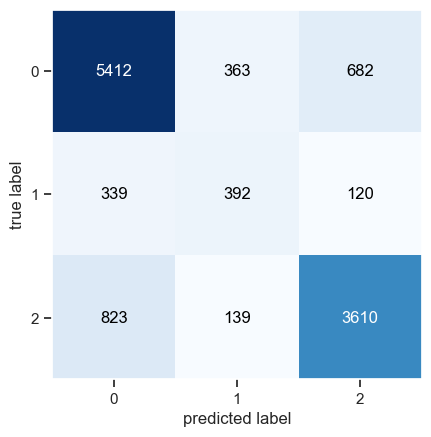

In [1027]:
df1= pd.get_dummies(df1, columns=cat_col, drop_first=True, dtype=int)
scaler = preprocessing.RobustScaler()


def scaleColumns(df, num_col):
    for col in num_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df1[col])),columns=[col])
    return df

scaled_df = scaleColumns(df1,[num_col])
used_cols = [c for c in scaled_df.columns.tolist() if c not in [target]]
X=scaled_df[used_cols]
y=scaled_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# set rf with best grid search results

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1,
                            criterion= 'gini',max_features= 'log2',
                             min_samples_split= 5,class_weight='balanced_subsample')


#giving all values to pipeline

#pipe = make_pipeline(preprocessor,rf)


rf.fit(X_train,y_train)
# predictions on train set
y_pred = rf.predict(X_train)

# predictions on test set
y_pred_test = rf.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")
print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

Accuracy:
TRAIN: 0.9096590909090909
TEST: 0.8084175084175084

Balanced Accuracy:
TRAIN: 0.8186220623297444
TEST: 0.6635100236597822


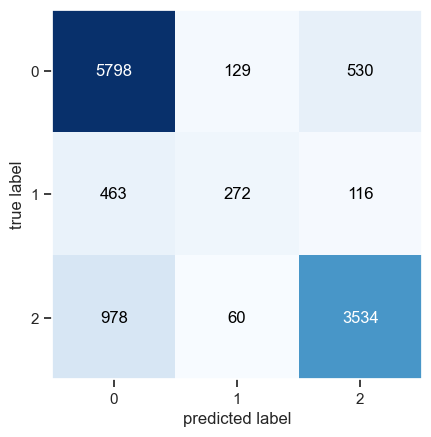

In [1031]:
xgb = XGBClassifier(objective='multi:softmax', booster='gbtree', num_class=3, eval_metric='merror', eta=0.3,
                    max_depth=12, colsample_bytree=0.8, n_jobs=-1, learning_rate=0.15)


#pipe = make_pipeline(preprocessor,xgb)
xgb.fit(X_train, y_train)


# make predictions on training set
y_pred = xgb.predict(X_train)

# make predictions on test set
y_pred_test = xgb.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

Accuracy:
TRAIN: 0.8312710437710438
TEST: 0.7961279461279461

Balanced Accuracy:
TRAIN: 0.6706507892306172
TEST: 0.631417313511874


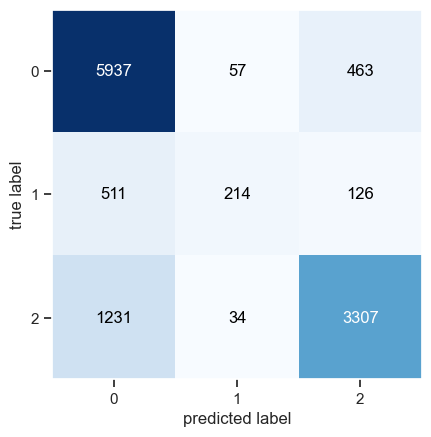

In [1032]:
xgb = XGBClassifier(objective='multi:softmax', booster='gbtree', num_class=3, eval_metric='merror', eta=0.2,
                    max_depth=8, colsample_bytree=0.6, n_jobs=-1, learning_rate=0.1)

#pipe = make_pipeline(preprocessor,xgb)
xgb.fit(X_train, y_train)


# make predictions on training set
y_pred = xgb.predict(X_train)

# make predictions on test set
y_pred_test = xgb.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

Accuracy:
TRAIN: 0.8347853535353535
TEST: 0.7957070707070707

Balanced Accuracy:
TRAIN: 0.6687867646276121
TEST: 0.6253141115213158


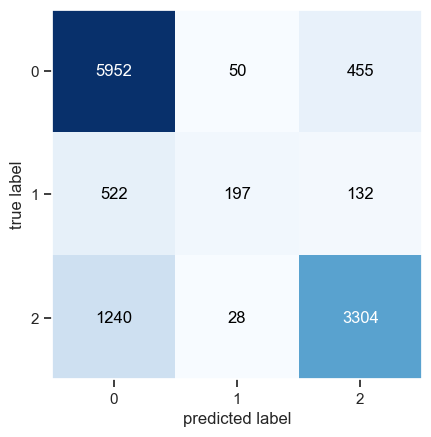

In [1033]:
xgb = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 10, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.05)

#pipe = make_pipeline(preprocessor,xgb)
xgb.fit(X_train, y_train)


# make predictions on training set
y_pred = xgb.predict(X_train)

# make predictions on test set
y_pred_test = xgb.predict(X_test)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")


cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()

In [1035]:
df4=df1.copy()

In [1037]:
df4

,status_group,gps_height,longitude,latitude,district_code,population,public_meeting,permit,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,...,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,decade_00s,decade_10s,decade_60s,decade_70s,decade_80s,decade_90s,installer_cat_Community,installer_cat_DANIDA,installer_cat_DWE,installer_cat_District council,installer_cat_Fini Water,installer_cat_Government,installer_cat_HESAWA,installer_cat_KKKT,installer_cat_LGA,installer_cat_Others,installer_cat_RC Church,installer_cat_RWE,installer_cat_TCRS,installer_cat_Unknown,installer_cat_villagers,installer_cat_world vision,funder_cat_Dhv,funder_cat_District Council,funder_cat_Dwe,funder_cat_Dwsp,funder_cat_Germany Republi,funder_cat_Government Of Tanzania,funder_cat_Hesawa,funder_cat_Kkkt,funder_cat_Ministry Of Water,funder_cat_Norad,funder_cat_Others,funder_cat_Private Individual,funder_cat_Rwssp,funder_cat_Tasaf,funder_cat_Tcrs,funder_cat_Unicef,funder_cat_Unknown,funder_cat_Water,funder_cat_World Bank,funder_cat_World Vision
0,0,0.773925,-0.055411,-0.927176,0.666667,-0.950276,0.0,-1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.780747,-0.117991,0.551184,-0.333333,-0.005525,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0.240288,0.604205,0.230180,0.333333,-0.171271,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2,-0.080349,0.872357,-1.176286,20.000000,-1.232044,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,-0.279704,-1.050949,0.612956,-0.666667,0.000000,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,0,0.637483,0.528150,0.339009,0.666667,-0.861878,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59396,0,0.638999,0.026146,-0.776500,0.333333,-1.243094,0.0,0.0,0,0,0,0,0,1,0,0,0

In [1038]:
scaler = preprocessing.RobustScaler()


def scaleColumns(df, num_col):
    for col in num_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df4[col])),columns=[col])
    return df

scaled_df = scaleColumns(df4,[num_col])

In [1039]:
# assign X and y
used_cols = [c for c in scaled_df.columns.tolist() if c not in [target]]
X=scaled_df[used_cols]
y=scaled_df[target]

In [1040]:
# making over-sampling

smt = SMOTE(sampling_strategy = 'auto', n_jobs = -1)

X_sampled, y_sample = smt.fit_resample(X, y)

print(y.value_counts())

y_sampled = pd.Series(y_sample) # converting from array to np.series to see value_counts

print(y_sampled.value_counts())

status_group
0    32259
2    22824
1     4317
Name: count, dtype: int64
status_group
0    32259
2    32259
1    32259
Name: count, dtype: int64


In [1041]:
#splitting train-test balanced target data
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [1042]:
X_trainNotS, X_testNotS, y_trainNotS, y_testNotS = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy:
TRAIN: 0.9383113108846437
TEST: 0.8515705724323207
Accuracy Not Sampled:
TEST Not Sampled: 0.8798821548821549


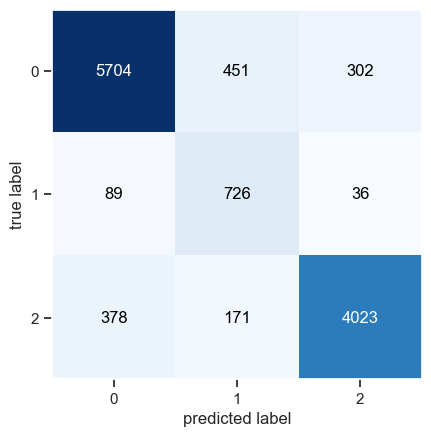

In [1043]:
# setting classifier
xgb_smote = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx',
                      num_class = 3, maximize = False, eval_metric = 'merror', eta = .1,
                      max_depth = 16, colsample_bytree = .4, n_jobs = -1,learning_rate = 0.1
                    )


xgb_smote.fit(X_train, y_train)


# predictions of training set
y_pred = xgb_smote.predict(X_train)

# redictions of test set
y_pred_test = xgb_smote.predict(X_test)


# redictions of test set not sampled
y_pred_testNot = xgb_smote.predict(X_testNotS)

# to print the results in good way
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("Accuracy Not Sampled:"); print("="*len("Accuracy:"))
print(f"TEST Not Sampled: {accuracy_score(y_testNotS, y_pred_testNot)}")

cm = confusion_matrix(y_testNotS, y_pred_testNot)
plot_confusion_matrix(cm)
plt.show()


In [ ]:
df5=df1.copy()

In [1044]:
df_test_set = pd.read_csv('Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv') 

In [1045]:
df_test_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [1046]:
df_test_set['funder_cat'] = df_test_set['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']


df_test_set.loc[~df_test_set["funder_cat"].isin(c_fund), "funder_cat"] = "Others"


df_test_set['installer_cat'] = df_test_set['installer'] # To make new categorizes, creating new column

c_ins = ['DWE','Unknown','Government','Community','DANIDA','RWE','District council', 'Central government',
         'KKKT','HESAWA','TCRS', 'world vision', 'Fini Water', 'RC Church','villagers','LGA']


df_test_set.loc[~df_test_set["installer_cat"].isin(c_ins), "installer_cat"] = "Others"
# converting the values which has less than 400 value counts to others



df_test_set['decade'] = df_test_set['construction_year'] #creating new columns
df_test_set['decade'].replace(to_replace = (1960,1961,1962,1963,1964,1965,1966,1967,1968,1969),
                        value ='60s' , inplace=True)
df_test_set['decade'].replace(to_replace = (1970,1971,1972,1973,1974,1975,1976,1977,1978,1979),
                        value ='70s' , inplace=True)
df_test_set['decade'].replace(to_replace = (1980,1981,1982,1983,1984,1985,1986,1987,1988,1989),
                        value ='80s' , inplace=True)
df_test_set['decade'].replace(to_replace = (1990,1991,1992,1993,1994,1995,1996,1997,1998,1999),
                        value ='90s' , inplace=True)
df_test_set['decade'].replace(to_replace = (2000,2001,2002,2003,2004,2005,2006,2007,2008,2009),
                        value ='00s' , inplace=True)
df_test_set['decade'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)


In [1047]:
df_test_set.drop(columns=['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'waterpoint_type_group'],inplace=True )
df_test_set.drop(columns=['recorded_by'],inplace=True ) 
df_test_set.drop(columns=['wpt_name','scheme_name','region_code'],inplace=True )
df_test_set.drop(columns=['amount_tsh'],inplace=True )
df_test_set.drop(columns=['date_recorded'],inplace=True )
df_test_set.drop(columns=['num_private'],inplace=True )
df_test_set.drop(columns=['subvillage'],inplace=True )
df_test_set.drop(columns=['funder','installer','construction_year'],inplace=True )
df_test_set.drop(columns=['lga','ward'],inplace=True ) 
df_test_set['public_meeting'] = df_test_set['public_meeting'].astype(bool).astype(int) #converting from T/F to 0-1

In [1048]:
df_test_set['permit'] = df_test_set['permit'].astype(bool).astype(int) #converting from T/F to 0-1

In [1049]:
df_test_set

,id,gps_height,longitude,latitude,basin,region,district_code,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,funder_cat,installer_cat,decade
0,50785,1996,35.290799,-4.059696,Internal,Manyara,3,321,1,1,other,parastatal,never pay,soft,seasonal,rainwater harvesting,other,Others,Others,10s
1,51630,1569,36.656709,-3.309214,Pangani,Arusha,2,300,1,1,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,Government Of Tanzania,DWE,00s
2,17168,1567,34.767863,-5.004344,Internal,Singida,2,500,1,1,other,vwc,never pay,soft,insufficient,rainwater harvesting,other,Others,Others,10s
3,45559,267,38.058046,-9.418672,Ruvuma / Southern Coast,Lindi,43,250,1,1,other,vwc,unknown,soft,dry,shallow well,other,Others,Others,80s
4,49871,1260,35.006123,-10.950412,Ruvuma / Southern Coast,Ruvuma,3,60,1,1,gravity,water board,pay monthly,soft,enough,spring,communal standpipe,Others,Others,00s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,34,38.852669,-6.582841,Wami / Ruvu,Pwani,1,20,1,1,mono,vwc,never pay,soft,enough,river,communal standpipe,Danida,Others,80s
14846,18990,0,37.451633,-5.350428,Pangani,Tanga,7,2960,1,0,nira/tanira,vwc,pay annually,salty,insufficient,shallow well,hand pump,Others,Others,90s
14847,28749,1476,34.739804,-4.585587,Internal,Singida,2,200,1,1,gravity,vwc,never pay,soft,insufficient,dam,communal standpipe,Others,Others,10s
14848,33492,998,35.432732,-10.584159,Lake Nyasa,Ruvuma,2,150,1,1,gravity,vwc,never pay,soft,insufficient,river,communal standpipe,Others,DWE,00s


In [1050]:
cat_col = ['basin','region','extraction_type_group','management','payment','water_quality','quantity',
               'source','waterpoint_type','decade','installer_cat','funder_cat']

In [1051]:
num_col = ['gps_height','longitude','latitude','district_code','population','public_meeting','permit']

In [1052]:
missing_values_count = df_test_set.isnull().sum()

print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
id                       0
gps_height               0
longitude                0
latitude                 0
basin                    0
region                   0
district_code            0
population               0
public_meeting           0
permit                   0
extraction_type_group    0
management               0
payment                  0
water_quality            0
quantity                 0
source                   0
waterpoint_type          0
funder_cat               0
installer_cat            0
decade                   0
dtype: int64


In [1053]:
#encoder = OneHotEncoder(handle_unknown='ignore')

#for c in cat_col:
    # Use the encoded values computed from the training set to encode the test set
#    df_test_set[str(c) + '_encoded'] = encoder.fit_transform(df_test_set[c].values)
#   df_test_set.drop(columns=c, inplace=True)
    
#encoded_columns = encoder.fit_transform(df_test_set[cat_col])

# Convert the encoded columns into a DataFrame
#encoded_df = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names_out(cat_col))

# Concatenate the encoded DataFrame with the original DataFrame
#df_test_set = pd.concat([df_test_set.drop(columns=cat_col), encoded_df], axis=1)   

# Using get_dummies to encode categorical variables
df_test_set = pd.get_dummies(df_test_set, columns=cat_col, drop_first=True, dtype=int)
 
scaler = preprocessing.RobustScaler()


def scaleColumns(df, num_col):
    for col in num_col:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df_test_set[col])),columns=[col])
    return df

scaled_df = scaleColumns(df_test_set,[num_col])


In [1054]:
df_test_set

,id,gps_height,longitude,latitude,district_code,population,public_meeting,permit,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,...,source_shallow well,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,decade_00s,decade_10s,decade_60s,decade_70s,decade_80s,decade_90s,installer_cat_Community,installer_cat_DANIDA,installer_cat_DWE,installer_cat_District council,installer_cat_Fini Water,installer_cat_Government,installer_cat_HESAWA,installer_cat_KKKT,installer_cat_LGA,installer_cat_Others,installer_cat_RC Church,installer_cat_RWE,installer_cat_TCRS,installer_cat_Unknown,installer_cat_villagers,funder_cat_Dhv,funder_cat_District Council,funder_cat_Dwe,funder_cat_Dwsp,funder_cat_Germany Republi,funder_cat_Government Of Tanzania,funder_cat_Hesawa,funder_cat_Kkkt,funder_cat_Ministry Of Water,funder_cat_Norad,funder_cat_Others,funder_cat_Private Individual,funder_cat_Rwssp,funder_cat_Tasaf,funder_cat_Tcrs,funder_cat_Unicef,funder_cat_Unknown,funder_cat_Water,funder_cat_World Bank,funder_cat_World Vision
0,50785,1.262997,0.094396,0.193243,0.000000,1.368182,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,51630,0.936544,0.425354,0.339724,-0.333333,1.272727,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,17168,0.935015,-0.032311,0.008863,-0.333333,2.181818,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,45559,-0.058869,0.764896,-0.852743,13.333333,1.045455,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,49871,0.700306,0.025419,-1.151714,0.000000,0.181818,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,-0.237003,0.957432,-0.299234,-0.666667,0.000000,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14846,18990,-0.262997,0.617963,-0.058687,1.333333,13.363636,0.0,-1.0,0,0,0,0,1,

In [1056]:
# Store the 'id' column separately
test_ids = df_test_set['id']

# Drop the 'id' column before making predictions
df_test_set_without_id = df_test_set.drop(columns=['id'])




In [1057]:
df_test_set_without_id

,gps_height,longitude,latitude,district_code,population,public_meeting,permit,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,management_parastatal,...,source_shallow well,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,decade_00s,decade_10s,decade_60s,decade_70s,decade_80s,decade_90s,installer_cat_Community,installer_cat_DANIDA,installer_cat_DWE,installer_cat_District council,installer_cat_Fini Water,installer_cat_Government,installer_cat_HESAWA,installer_cat_KKKT,installer_cat_LGA,installer_cat_Others,installer_cat_RC Church,installer_cat_RWE,installer_cat_TCRS,installer_cat_Unknown,installer_cat_villagers,funder_cat_Dhv,funder_cat_District Council,funder_cat_Dwe,funder_cat_Dwsp,funder_cat_Germany Republi,funder_cat_Government Of Tanzania,funder_cat_Hesawa,funder_cat_Kkkt,funder_cat_Ministry Of Water,funder_cat_Norad,funder_cat_Others,funder_cat_Private Individual,funder_cat_Rwssp,funder_cat_Tasaf,funder_cat_Tcrs,funder_cat_Unicef,funder_cat_Unknown,funder_cat_Water,funder_cat_World Bank,funder_cat_World Vision
0,1.262997,0.094396,0.193243,0.000000,1.368182,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.936544,0.425354,0.339724,-0.333333,1.272727,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.935015,-0.032311,0.008863,-0.333333,2.181818,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.058869,0.764896,-0.852743,13.333333,1.045455,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.700306,0.025419,-1.151714,0.000000,0.181818,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,-0.237003,0.957432,-0.299234,-0.666667,0.000000,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14846,-0.262997,0.617963,-0.058687,1.333333,13.363636,0.0,-1.0,0,0,0,0,1,0,0,0,0,0,0

In [1064]:
pd.set_option('display.max_columns', None)

In [1067]:
train_columns = set(X_train.columns)
test_columns = set(df_test_set_without_id.columns)

# Find the columns that are in one set but not the other
train_not_in_test = train_columns - test_columns
test_not_in_train = test_columns - train_columns

# Print the column names that are in train set but not in test set
print("Columns in train set but not in test set:")
print(train_not_in_test)

# Print the column names that are in test set but not in train set
print("\nColumns in test set but not in train set:")
print(test_not_in_train)

Columns in train set but not in test set:
{'installer_cat_world vision'}

Columns in test set but not in train set:
set()


In [1065]:
print(df_test_set_without_id.columns)

Index(['gps_height', 'longitude', 'latitude', 'district_code', 'population',
       'public_meeting', 'permit', 'basin_Lake Nyasa', 'basin_Lake Rukwa',
       'basin_Lake Tanganyika',
       ...
       'funder_cat_Others', 'funder_cat_Private Individual',
       'funder_cat_Rwssp', 'funder_cat_Tasaf', 'funder_cat_Tcrs',
       'funder_cat_Unicef', 'funder_cat_Unknown', 'funder_cat_Water',
       'funder_cat_World Bank', 'funder_cat_World Vision'],
      dtype='object', length=131)


In [1063]:
print(X_test.columns)

Index(['gps_height', 'longitude', 'latitude', 'district_code', 'population',
       'public_meeting', 'permit', 'basin_Lake Nyasa', 'basin_Lake Rukwa',
       'basin_Lake Tanganyika',
       ...
       'funder_cat_Others', 'funder_cat_Private Individual',
       'funder_cat_Rwssp', 'funder_cat_Tasaf', 'funder_cat_Tcrs',
       'funder_cat_Unicef', 'funder_cat_Unknown', 'funder_cat_Water',
       'funder_cat_World Bank', 'funder_cat_World Vision'],
      dtype='object', length=132)


In [1068]:
df_test_set_without_id['installer_cat_world vision'] = 0

In [1069]:
train_columns = set(X_train.columns)
test_columns = set(df_test_set_without_id.columns)

# Find the columns that are in one set but not the other
train_not_in_test = train_columns - test_columns
test_not_in_train = test_columns - train_columns

# Print the column names that are in train set but not in test set
print("Columns in train set but not in test set:")
print(train_not_in_test)

# Print the column names that are in test set but not in train set
print("\nColumns in test set but not in train set:")
print(test_not_in_train)

Columns in train set but not in test set:
set()

Columns in test set but not in train set:
set()


In [1071]:
# Assuming 'column_name' is the name of the column you want to find the index of
column_name = 'installer_cat_world vision'

# Get the index of the column in the train set
column_index = X_train.columns.get_loc(column_name)

print("Index of the column '{}' in the train set: {}".format(column_name, column_index))


Index of the column 'installer_cat_world vision' in the train set: 111


In [1072]:
# Assuming 'column_name' is the name of the column you want to find the index of
column_name = 'installer_cat_world vision'

# Get the index of the column in the train set
column_index = df_test_set_without_id.columns.get_loc(column_name)

print("Index of the column '{}' in the train set: {}".format(column_name, column_index))


Index of the column 'installer_cat_world vision' in the train set: 131


In [1075]:
# Remove a column from a specific index in the test set DataFrame
def remove_column_from_index(df, index):
    if index < len(df.columns):
        df.pop(df.columns[index])

# Insert a column at a specific index in the test set DataFrame
def insert_column_at_index(df, index, column_name, column_values):
    if index <= len(df.columns):
        df.insert(index, column_name, column_values)

# Assuming 'remove_index' is the index of the column you want to remove
remove_index = 131  # Change this to the desired index
remove_column_from_index(df_test_set_without_id, remove_index)

# Assuming 'insert_index' is the index where you want to insert the new column
insert_index = 111  # Change this to the desired index

# Assuming 'new_column_name' is the name of the new column you want to insert
new_column_name = 'installer_cat_world vision'

# Assuming 'new_column_values' is the values you want to assign to the new column
new_column_values = [0] * len(df_test_set)  # For example, fill with zeros

insert_column_at_index(df_test_set_without_id, insert_index, new_column_name, new_column_values)


In [1076]:
# Assuming 'column_name' is the name of the column you want to find the index of
column_name = 'installer_cat_world vision'

# Get the index of the column in the train set
column_index = df_test_set_without_id.columns.get_loc(column_name)

print("Index of the column '{}' in the train set: {}".format(column_name, column_index))

Index of the column 'installer_cat_world vision' in the train set: 111


In [1077]:
# Make predictions
y_pred_test = xgb_smote.predict(df_test_set_without_id)



In [1078]:
predictions_df = pd.DataFrame({'id': test_ids, 'status_group': y_pred_test})

# Save the DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

In [1079]:
df1

,status_group,gps_height,longitude,latitude,district_code,population,public_meeting,permit,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,extraction_type_group_gravity,extraction_type_group_india mark ii,extraction_type_group_india mark iii,extraction_type_group_mono,extraction_type_group_nira/tanira,extraction_type_group_other,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_group_rope pump,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_wind-powered,management_other,management_other - school,management_parastatal,management_private operator,management_trust,management_unknown,management_vwc,management_water authority,management_water board,management_wua,management_wug,payment_other,payment_pay annually,payment_pay monthly,payment_pay per bucket,payment_pay when scheme fails,payment_unknown,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,decade_00s,decade_10s,decade_60s,decade_70s,decade_80s,decade_90s,installer_cat_Community,installer_cat_DANIDA,installer_cat_DWE,installer_cat_District council,installer_cat_Fini Water,installer_cat_Government,installer_cat_HESAWA,installer_cat_KKKT,installer_cat_LGA,installer_cat_Others,installer_cat_RC Church,installer_cat_RWE,installer_cat_TCRS,installer_cat_Unknown,installer_cat_villagers,installer_cat_world vision,funder_cat_Dhv,funder_cat_District Council,funder_cat_Dwe,funder_cat_Dwsp,funder_cat_Germany Republi,funder_cat_Government Of Tanzania,funder_cat_Hesawa,funder_cat_Kkkt,funder_cat_Ministry Of Water,funder_cat_Norad,funder_cat_Others,funder_cat_Private Individual,funder_cat_Rwssp,funder_cat_Tasaf,funder_cat_Tcrs,funder_cat_Unicef,funder_cat_Unknown,funder_cat_Water,funder_cat_World Bank,funder_cat_World Vision
0,0,0.773925,-0.055411,-0.927176,0.666667,-0.950276,0.0,-1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.780747,-0.117991,0.551184,-0.333333,-0.005525,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0.240288,0.604205,0.230180,0.333333,-0.171271,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2,-0.080349,0.872357,-1.176286,20.000000,-1.232044,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,-0.279704,-1.050949,0.612956,-0.666667,0.000000,0.0,0.0,0,0,0,1,0,0,0,0,

In [1080]:
df['status_group'].value_counts()

status_group
0    32259
2    22824
1     4317
Name: count, dtype: int64

In [1081]:
# Define a mapping dictionary to replace labels with categories
label_map = {0: 'functional', 1: 'functional needs repair', 2: 'non functional'}

# Replace predicted labels with categories
predicted_labels = [label_map[label] for label in y_pred_test]

# Create a DataFrame to store id and predictions
result_df = pd.DataFrame({'id': test_ids, 'prediction': predicted_labels})

# Save the results to a CSV file
result_df.to_csv('predictions.csv', index=False)


Accuracy on Training Set: 0.7340385683470892
Accuracy on Test Set: 0.7092891093201075


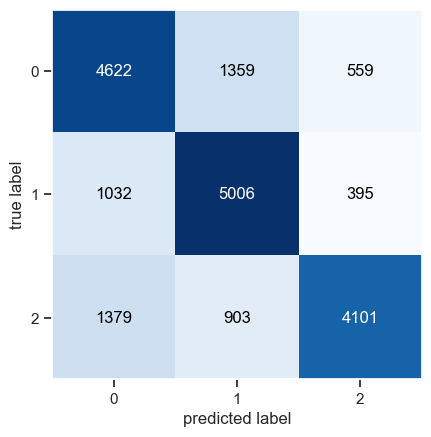

In [1083]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth=12, random_state=42)

# Fit the decision tree model to the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = decision_tree.predict(X_train)

# Make predictions on the test set
y_pred_test = decision_tree.predict(X_test)

# Print the accuracy of the decision tree model
print("Accuracy on Training Set:", accuracy_score(y_train, y_pred_train))
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_test))


# Generate confusion matrix and plot it
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()
